In [ ]:
!pip install yfinance
!pip install quantstats
!pip install pyportfolioopt

We importing all necessary libraries and functions

In [ ]:
#Hiding warnings
from logging import WARNING
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

# Data handling and statistical analysis
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Optimization and allocation
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import black_litterman, BlackLittermanModel

# Financial data
import quantstats as qs
import yfinance as yf

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime
import datetime as dt

#Neural network
import tensorflow as tf

Stocks we want to analyze will be AstraZeneca, Intel, HSBC, McDonald's, Nike and Toyota. We selected one stocks from each industry because we want to try which industry was the best to investing through years.

In [ ]:
azn = qs.utils.download_returns('AZN') #AstraZeneca
azn = azn.loc['2010-07-01':'2023-06-01']

intel = qs.utils.download_returns('INTC')
intel = intel.loc['2010-07-01':'2023-06-01']

hsbc = qs.utils.download_returns('HSBC')
hsbc = hsbc.loc['2010-07-01':'2023-06-01']

mcd = qs.utils.download_returns('MCD')#McDonald's
mcd = mcd.loc['2010-07-01':'2023-06-01']

nike = qs.utils.download_returns('NKE')
nike = nike.loc['2010-07-01':'2023-06-01']

tm = qs.utils.download_returns('TM') #Toyota
tm = tm.loc['2010-07-01':'2023-06-01']

In [ ]:
azn.index = azn.index.tz_convert(None)
intel.index = intel.index.tz_convert(None)
hsbc.index = hsbc.index.tz_convert(None)
mcd.index = mcd.index.tz_convert(None)
nike.index = nike.index.tz_convert(None)
tm.index = tm.index.tz_convert(None)

Let's see how look like Daily Returns our stocks through whole period which we considering from 1st July 2010 to 1st June 2023

Astra Zeneca Daily Returns Plot:


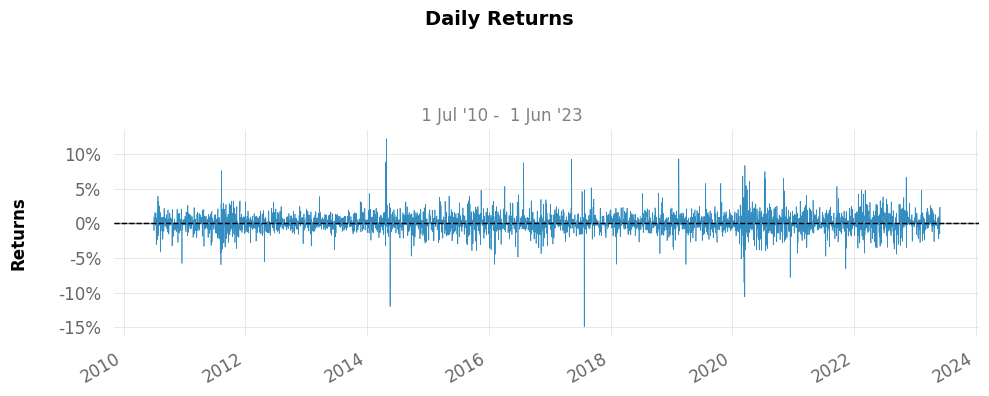

Intel Inc. Daily Returns Plot:


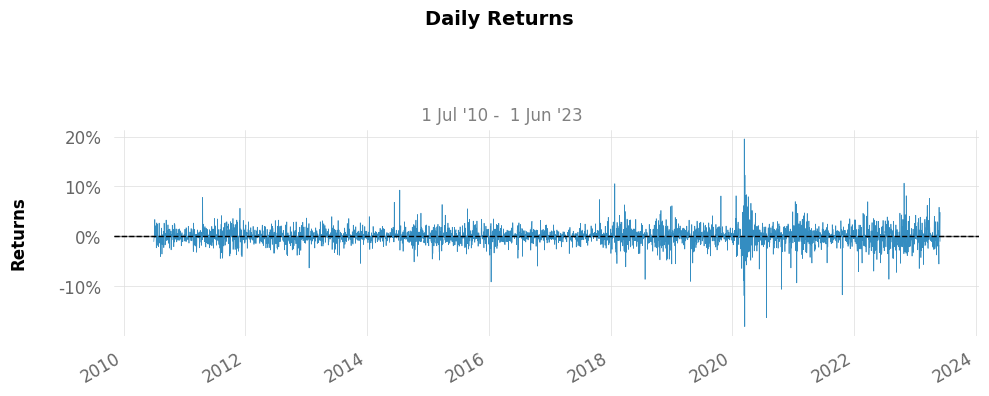

HSBC Daily Returns Plot:


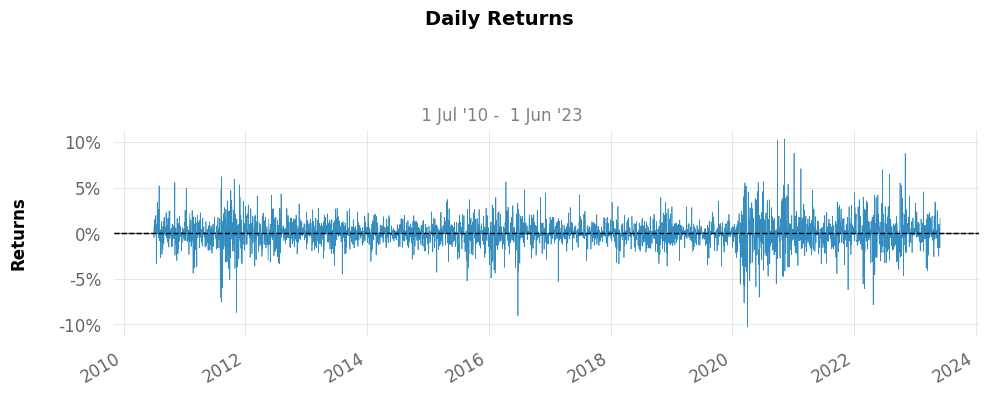

McDonald's Daily Returns Plot:


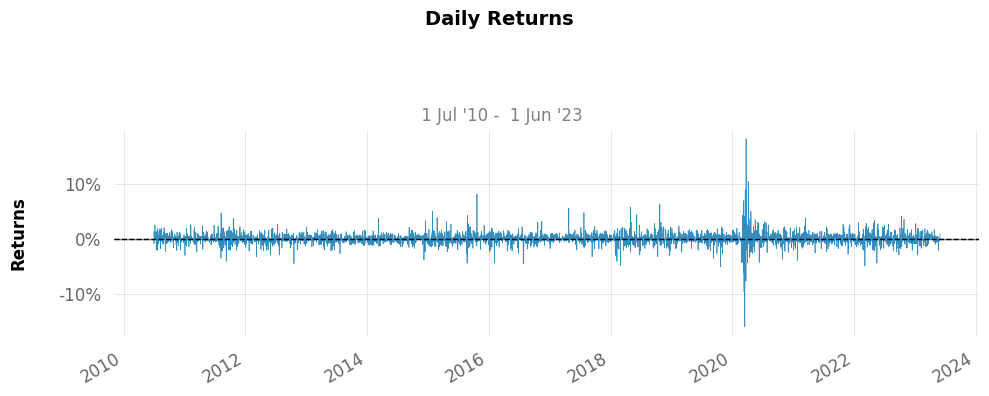

Nike Daily Returns Plot:


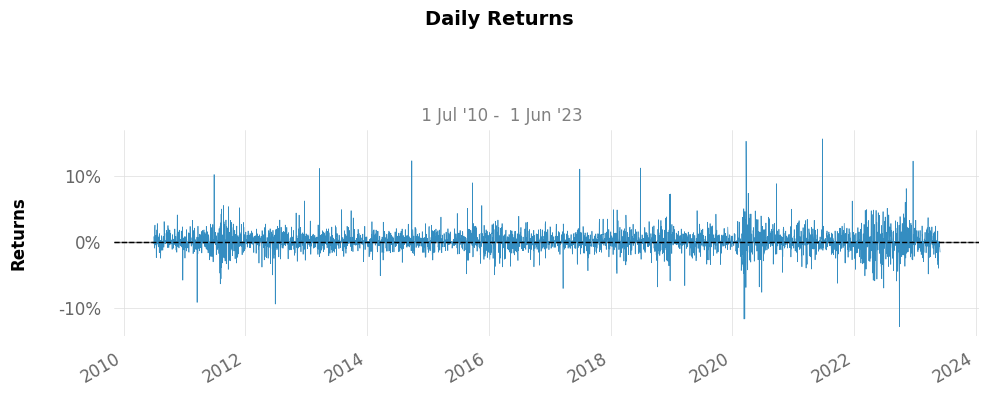

Toyota Daily Returns Plot:


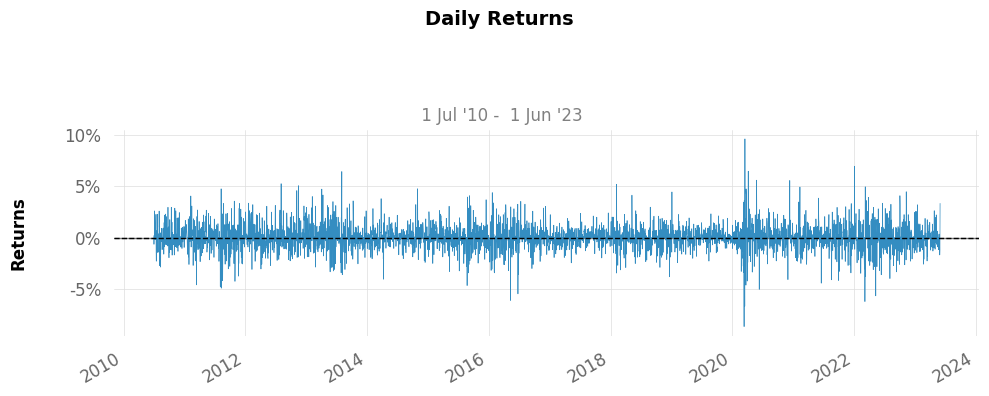

In [ ]:
print('Astra Zeneca Daily Returns Plot:')
qs.plots.daily_returns(azn)

print('Intel Inc. Daily Returns Plot:')
qs.plots.daily_returns(intel)

print('HSBC Daily Returns Plot:')
qs.plots.daily_returns(hsbc)

print('''McDonald's Daily Returns Plot:''')
qs.plots.daily_returns(mcd)

print('''Nike Daily Returns Plot:''')
qs.plots.daily_returns(nike)

print('''Toyota Daily Returns Plot:''')
qs.plots.daily_returns(tm)

We can see that from our stocks Intel had the biggest volatility from about -15% to 20% changes in daily returns whereas Toyota stocks was the most stable where volatility was from -5% to 10% changes in daily returns

Let's also how look like Cumulative Returns all ours stocks.




Astra Zeneca Cumulative Returns Plot



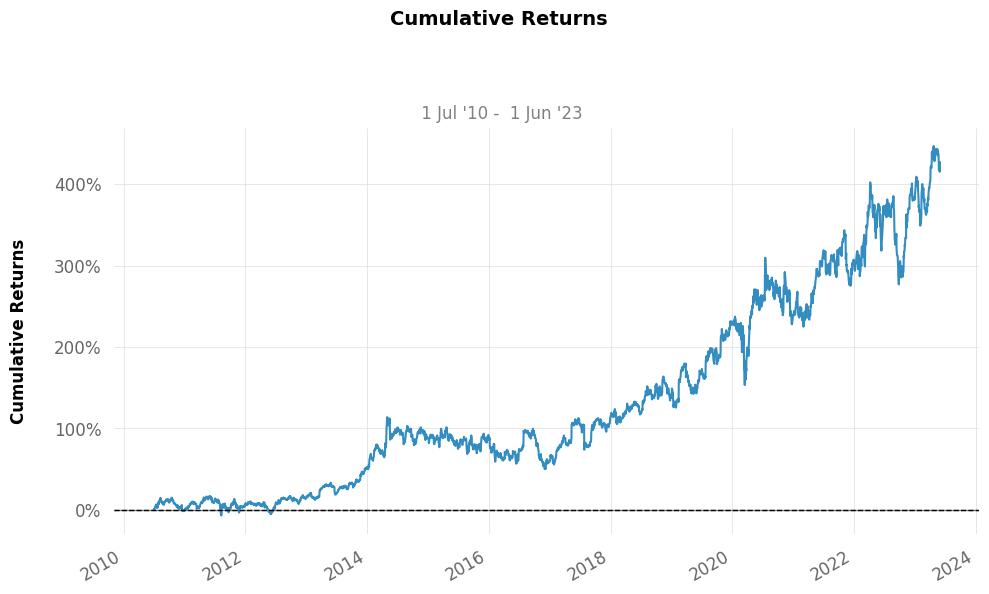






Intel Cumulative Returns Plot



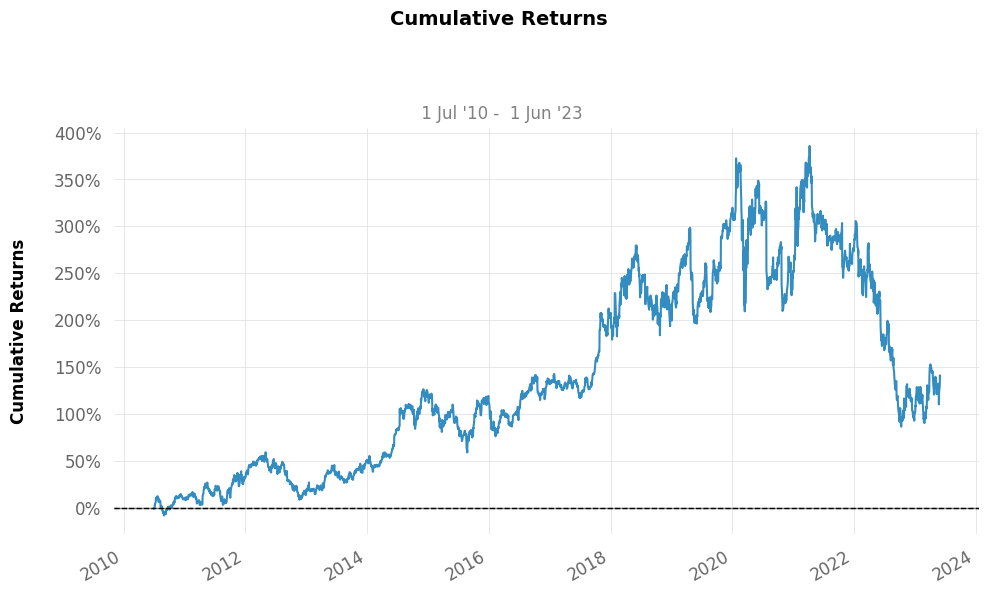






HSBC Cumulative Returns Plot



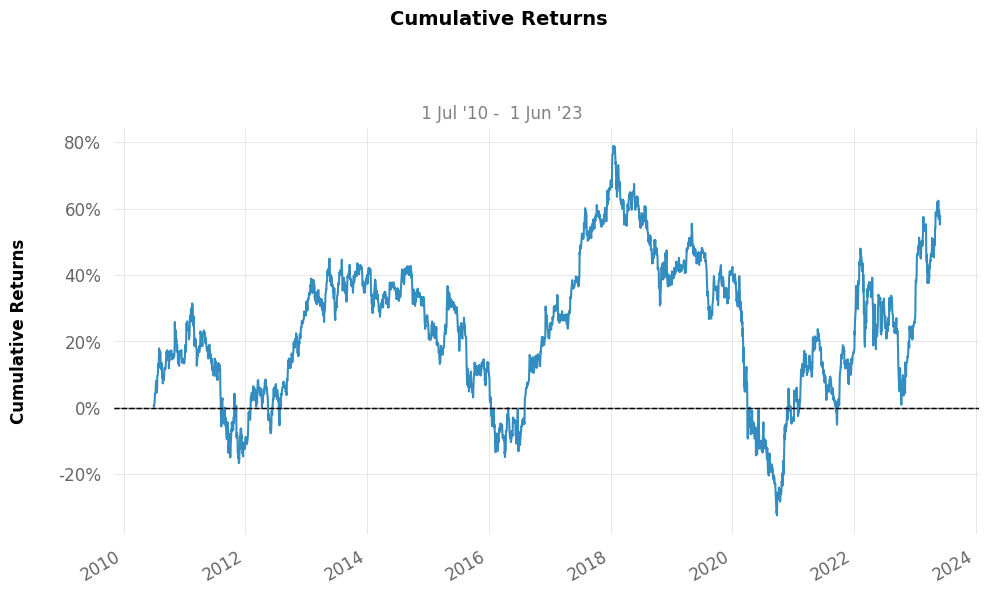






McDonald Cumulative Returns Plot



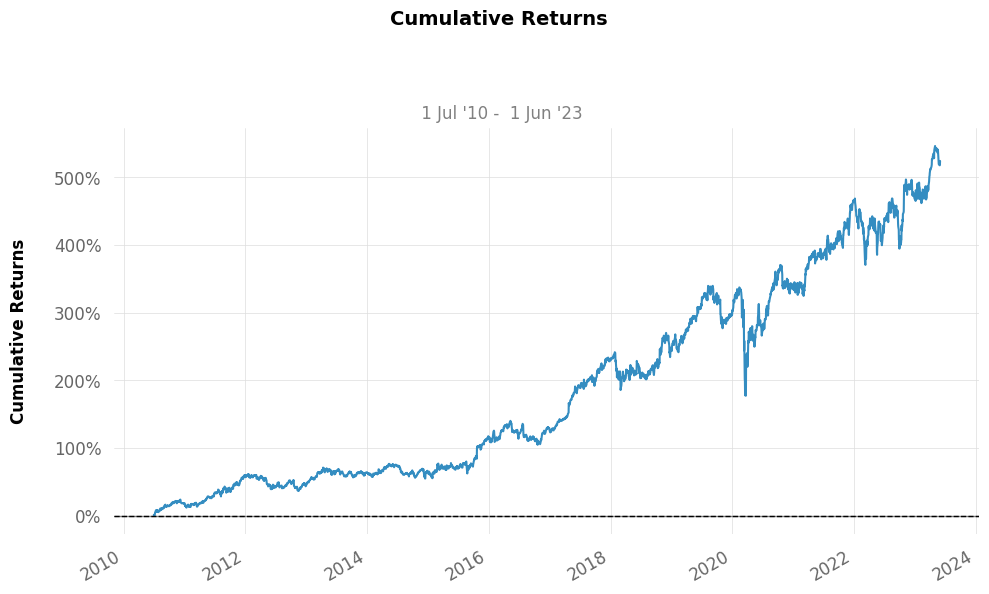






Nike Cumulative Returns Plot



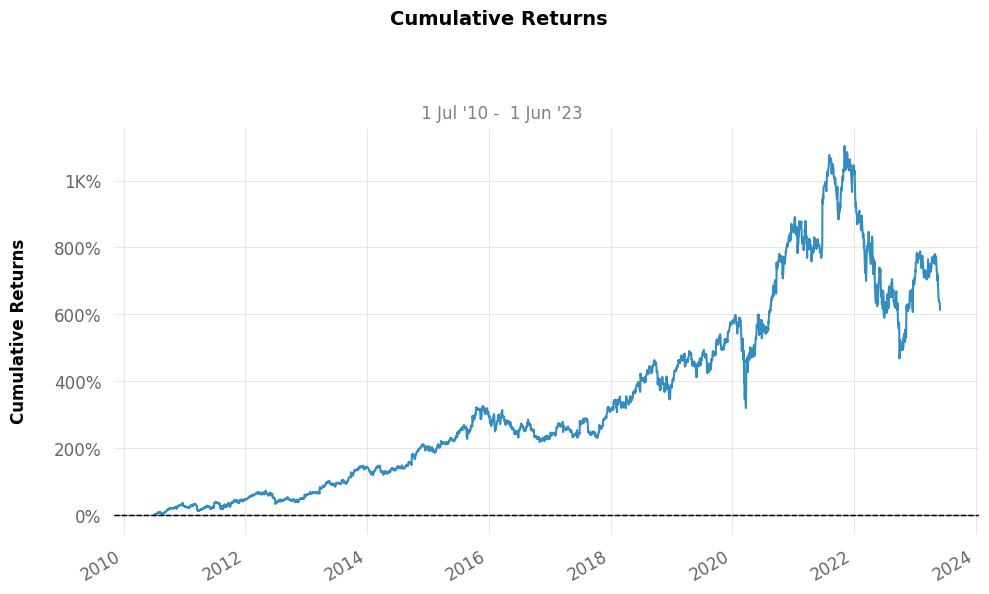






Toyota Cumulative Returns Plot



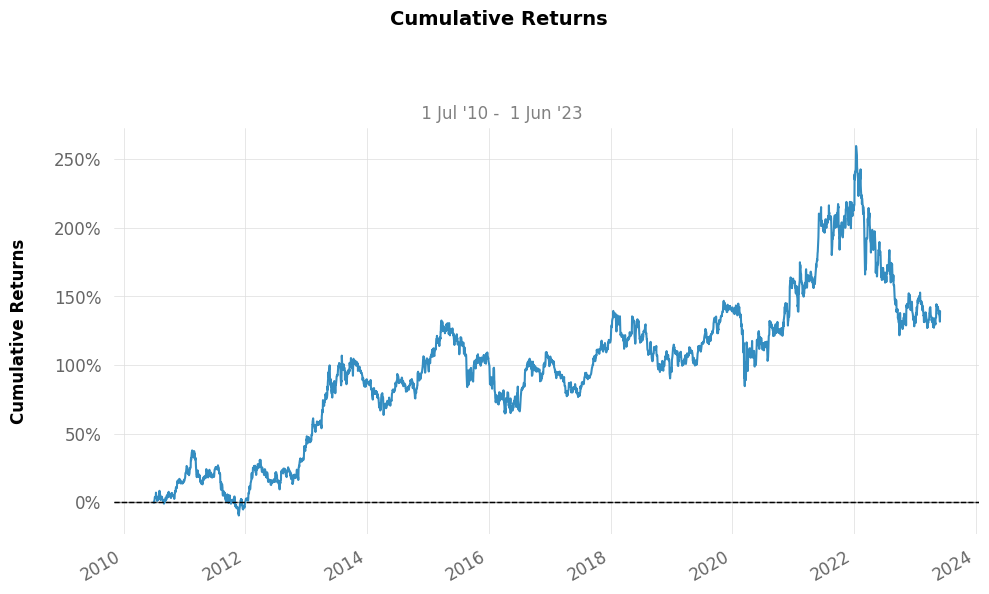

In [ ]:
# Plotting Cumulative Returns for each stock
print('\n')
print('\nAstra Zeneca Cumulative Returns Plot\n')
qs.plots.returns(azn)
print('\n')
print('\n')
print('\nIntel Cumulative Returns Plot\n')
qs.plots.returns(intel)
print('\n')
print('\n')
print('\nHSBC Cumulative Returns Plot\n')
qs.plots.returns(hsbc)
print('\n')
print('\n')
print('\nMcDonald Cumulative Returns Plot\n')
qs.plots.returns(mcd)
print('\n')
print('\n')
print('\nNike Cumulative Returns Plot\n')
qs.plots.returns(nike)
print('\n')
print('\n')
print('\nToyota Cumulative Returns Plot\n')
qs.plots.returns(tm)

To see how look like volatility our stocks more clear we can use histograms to visualize it.




Astra Zeneca Daily Returns Histogram


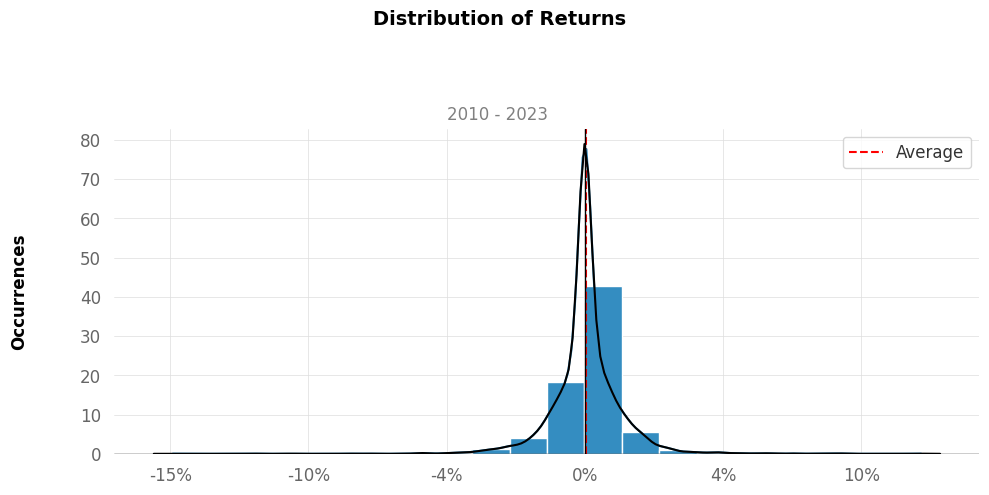




Intel Daily Returns Histogram


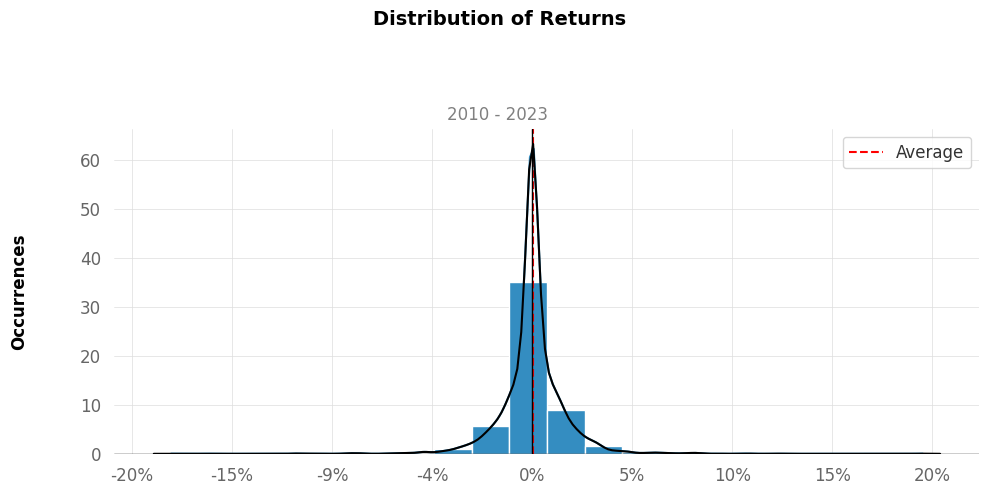




HSBC Company Daily Returns Histogram


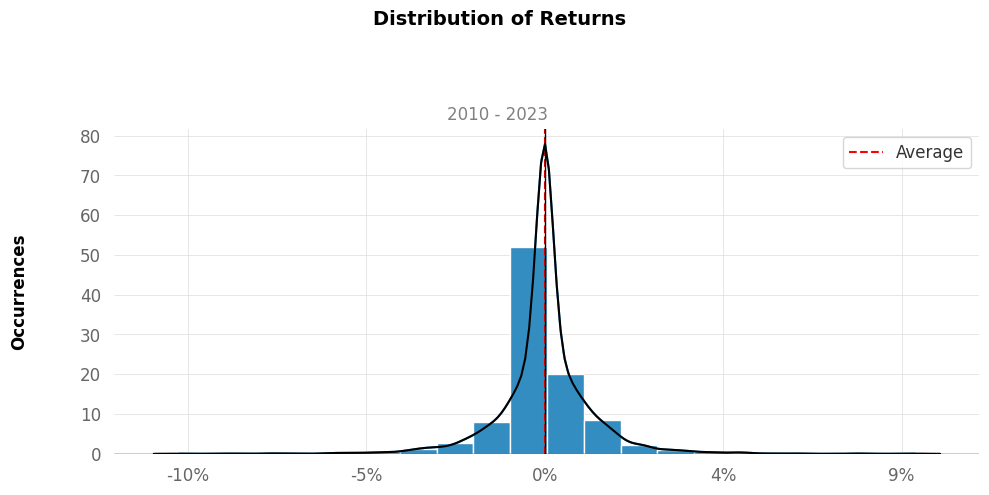




McDonald Daily Returns Histogram


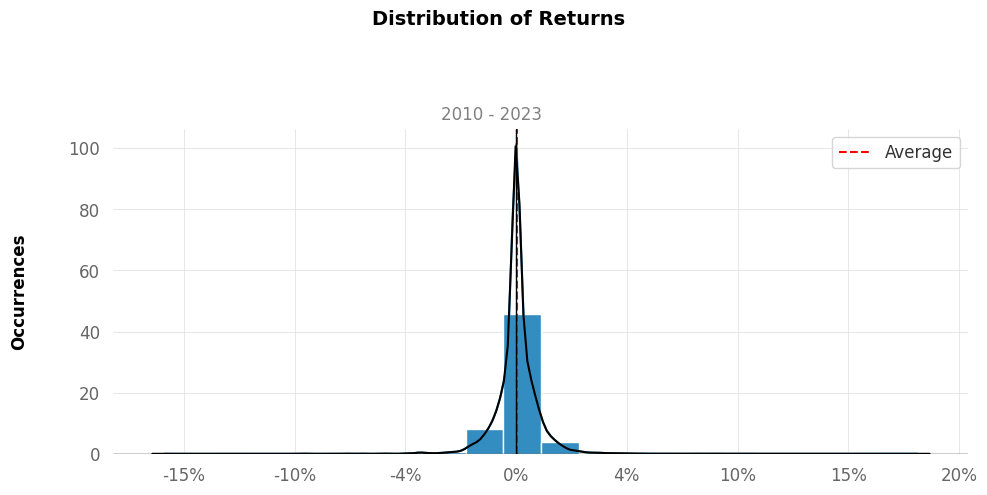




Nike Daily Returns Histogram


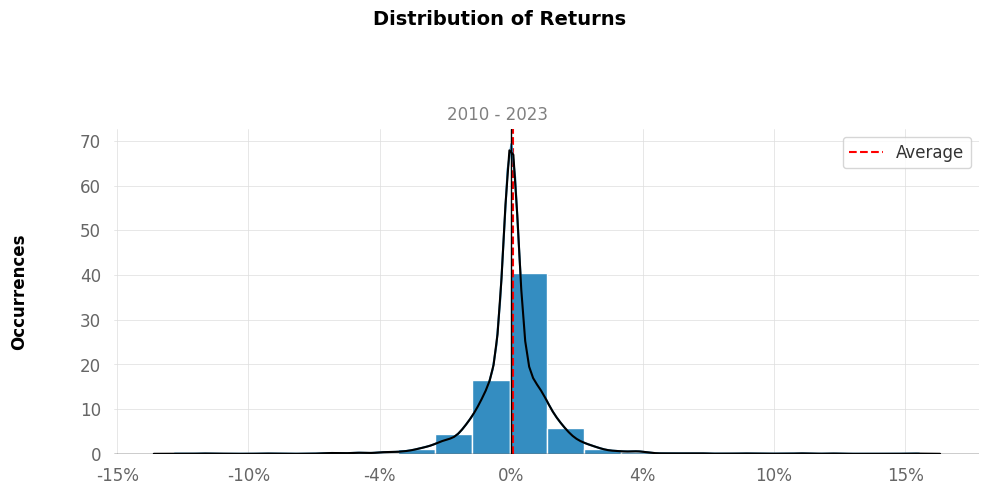




Toyota Daily Returns Histogram


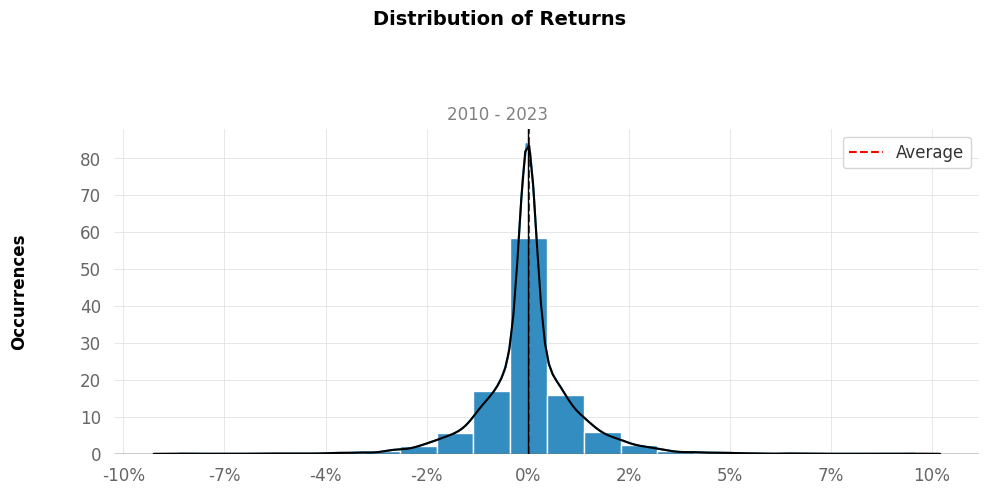

In [ ]:
# Plotting histograms for daily returns
print('\n')
print('\nAstra Zeneca Daily Returns Histogram')
qs.plots.histogram(azn, resample = 'D')
print('\n')
print('\nIntel Daily Returns Histogram')
qs.plots.histogram(intel, resample = 'D')
print('\n')
print('\nHSBC Company Daily Returns Histogram')
qs.plots.histogram(hsbc, resample = 'D')
print('\n')
print('\nMcDonald Daily Returns Histogram')
qs.plots.histogram(mcd, resample = 'D')
print('\n')
print('\nNike Daily Returns Histogram')
qs.plots.histogram(nike, resample = 'D')
print('\n')
print('\nToyota Daily Returns Histogram')
qs.plots.histogram(tm, resample = 'D')

We see that intel stock has the highest variance, while toyota stock is the most stable, which may mean that for someone who wants to take a conservative approach in the market, Toyota stock can play a big role because there is no high risk of volatility. Intel shares, on the other hand, can play a key role in an aggressive approach, as their high volatility risk can result in high profits but also large losses.

Let's see correlation between our stocks

In [ ]:
#Analyzing data correlation
df = pd.concat([azn, intel, hsbc, mcd, nike, tm], join = 'outer', axis = 1)
df.columns = ['Astra', 'Intel', 'HSBC', 'McDonald','Nike','Toyota']
df

Astra     Intel      HSBC  McDonald      Nike  \
Date                                                                    
2010-07-01 04:00:00  0.008912 -0.010283  0.007019  0.012752  0.007698   
2010-07-02 04:00:00 -0.010515 -0.002597 -0.004574 -0.008544 -0.003085   
2010-07-06 04:00:00  0.015303  0.014583  0.014004 -0.000453 -0.009578   
2010-07-07 04:00:00  0.011723  0.033880  0.015106  0.018151  0.020086   
2010-07-08 04:00:00  0.009104 -0.001985  0.009566  0.025405  0.025088   
...                       ...       ...       ...       ...       ...   
2023-05-25 04:00:00 -0.008425 -0.055172  0.010215 -0.001399 -0.007480   
2023-05-26 04:00:00  0.010168  0.058394  0.006386  0.001821  0.000279   
2023-05-30 04:00:00 -0.015030  0.034138 -0.010576 -0.003915 -0.009208   
2023-05-31 04:00:00  0.023100  0.048349 -0.016034  0.000667 -0.011829   
2023-06-01 04:00:00 -0.003284 -0.009860  0.016295  0.009681 -0.015486   

                       Toyota  
Date                           
2010-07-01 04:00:00  0.001896  
2010-07-02 04:00:00 -0.006405  
2010-07-06 04:00:00  0.025930  
2010-07-07 04:00:00  0.013851  
2010-07-08 04:00:00  0.002958  
...                       ...  
2023-05-25 04:00:00  0.001938  
2023-05-26 04:00:00  0.003438  
2023-05-30 04:00:00 -0.016776  
2023-05-31 04:00:00 -0.011617  
2023-06-01 04:00:00  0.033203  

[3252 rows x 6 columns]

<ipython-input-58-308565ed2970>:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



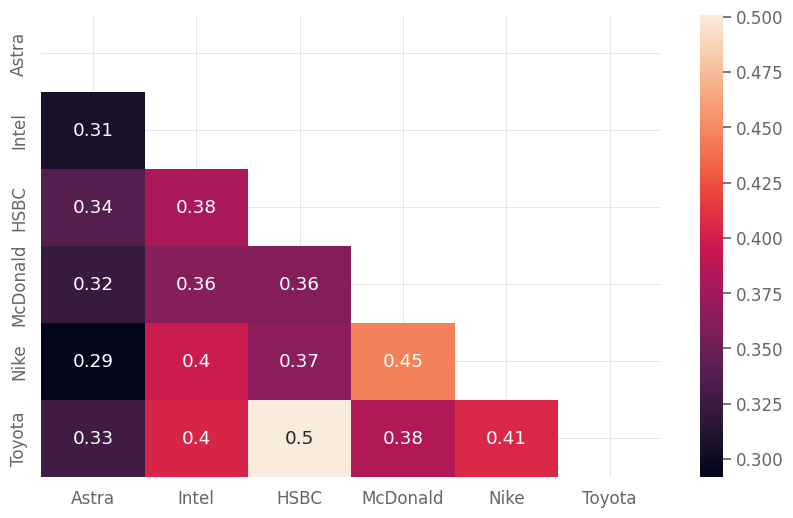

In [ ]:
# Correlation Matrix
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask = mask)
plt.show()

It means that the biggest correlation is between HSBC and Toyota shares. The lowest correlation appears between Nike and AstraZeneca

#Making a portfolio

We create initial portfolio with initial values for each shares

In [ ]:
weights = [0.17, 0.17, 0.17, 0.17, 0.16, 0.16]
portfolio = azn*weights[0] + intel*weights[1] + hsbc*weights[2] + mcd*weights[3] + nike*weights[4] + tm*weights[5]
portfolio

Date
2010-07-01 04:00:00    0.004663
2010-07-02 04:00:00   -0.005978
2010-07-06 04:00:00    0.010001
2010-07-07 04:00:00    0.018836
2010-07-08 04:00:00    0.011643
                         ...   
2023-05-25 04:00:00   -0.010200
2023-05-26 04:00:00    0.013646
2023-05-30 04:00:00   -0.003373
2023-05-31 04:00:00    0.005783
2023-06-01 04:00:00    0.005016
Name: Close, Length: 3252, dtype: float64

And now we create report where we compare our portfolio to american benchmark sp500 to see performane of this portfolio.

In [ ]:
# Data from sp500, american benchmark
sp500 = qs.utils.download_returns( '^GSPC' )
sp500 = sp500.loc[ '2010-07-01' : '2023-06-01' ]
sp500.index = sp500 .index.tz_convert(None)

[Performance Metrics]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2010-07-01  2010-07-01
End Period                 2023-06-01  2023-06-01
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          339.39%     309.53%
CAGR﹪                     12.13%      11.52%

Sharpe                     0.77        0.71
Prob. Sharpe Ratio         99.66%      99.4%
Smart Sharpe               0.68        0.63
Sortino                    1.08        0.99
Smart Sortino              0.96        0.88
Sortino/√2                 0.76        0.7
Smart Sortino/√2           0.68        0.63
Omega                      1.15        1.15

Max Drawdown               -29.22%     -33.92%
Longest DD Days            498         512
Volatility (ann.)          16.86%      17.62%
R^2                        0.76        0.76
Information Ratio          0.0         0.0
Calmar           

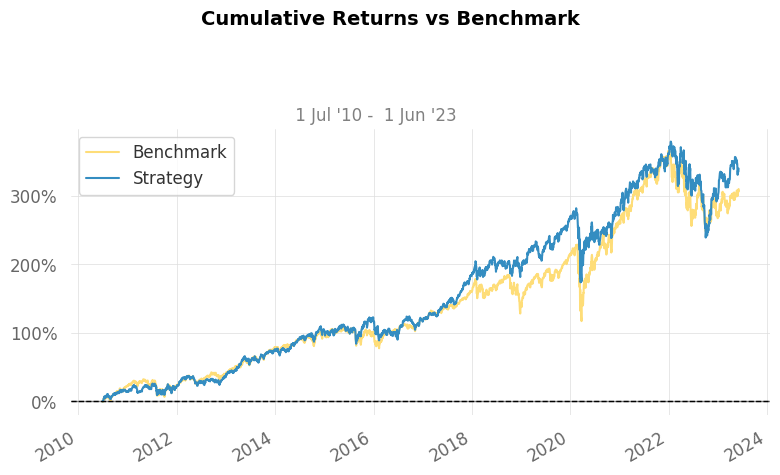

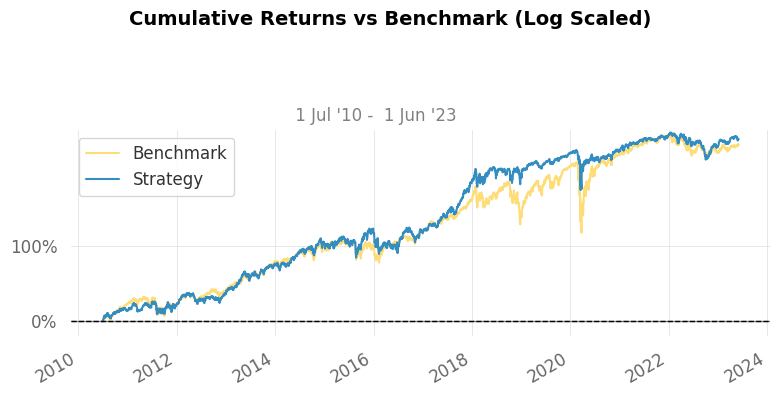

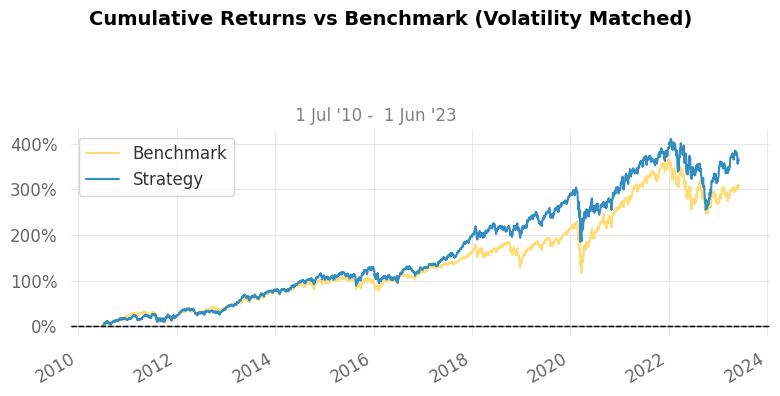

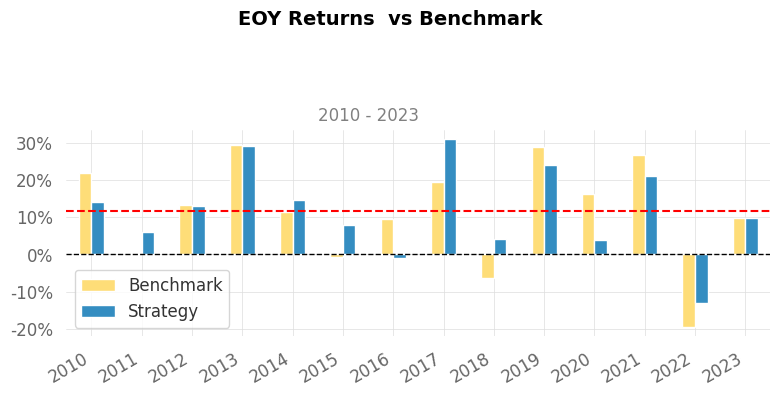

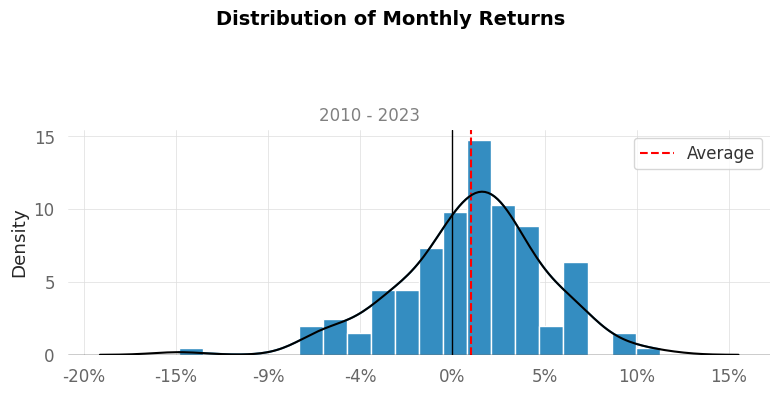

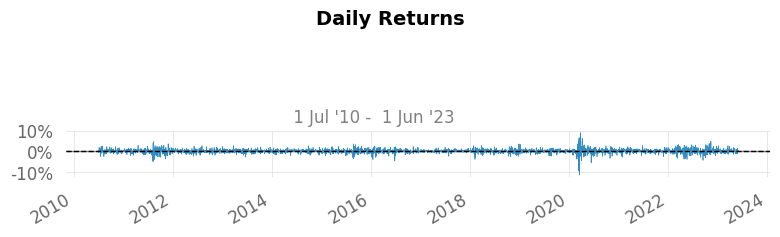

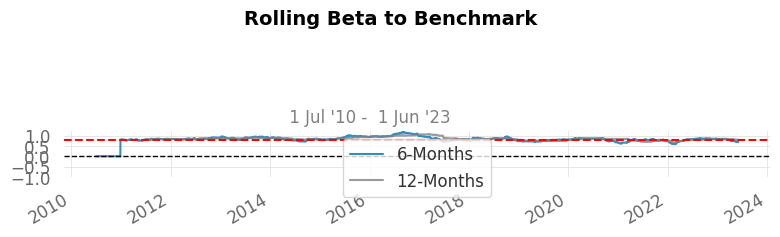

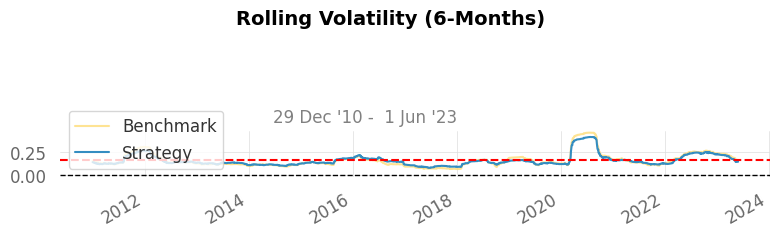

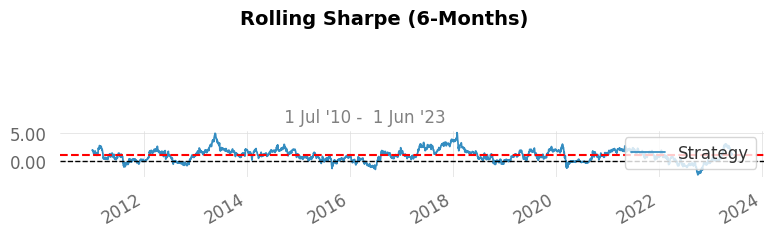

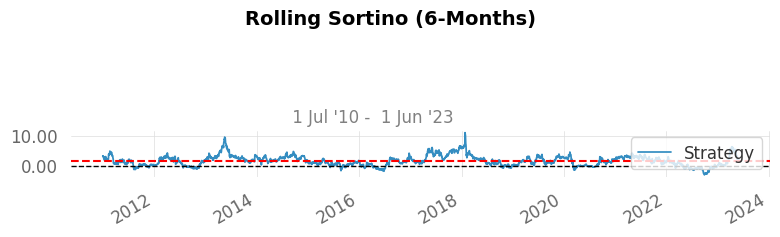

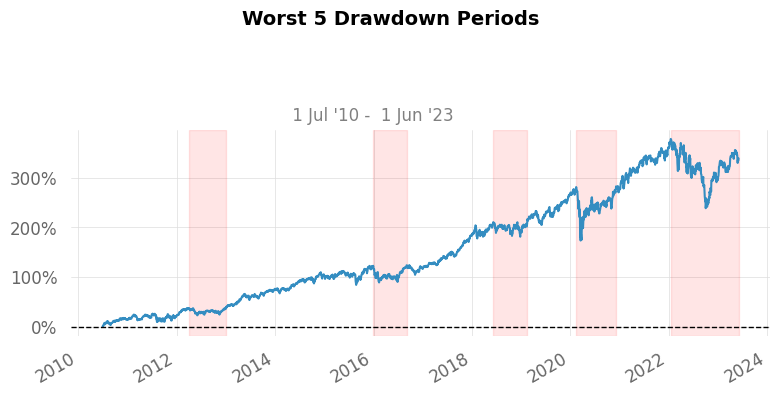

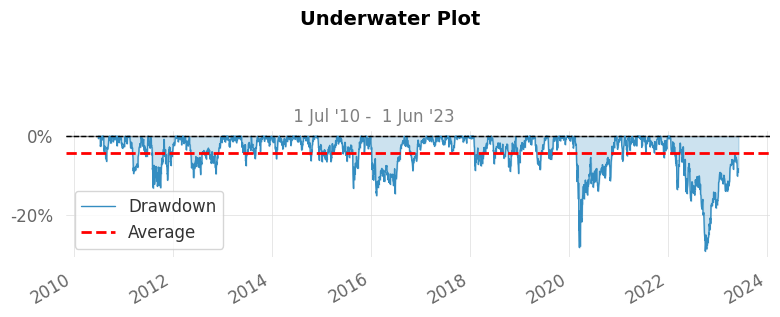

/usr/local/lib/python3.10/dist-packages/quantstats/stats.py:968: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



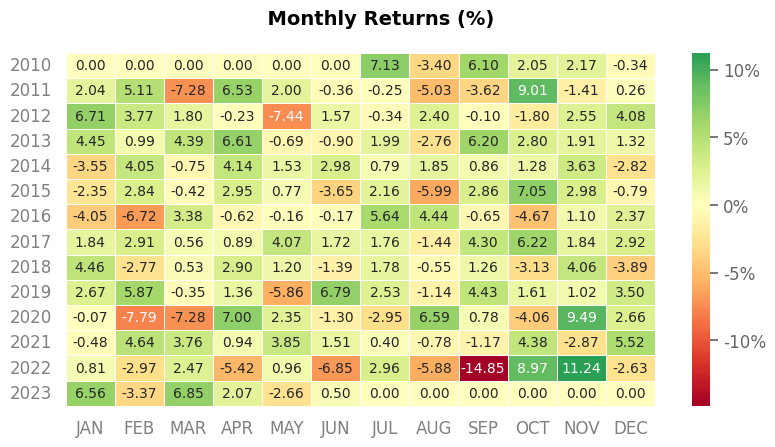

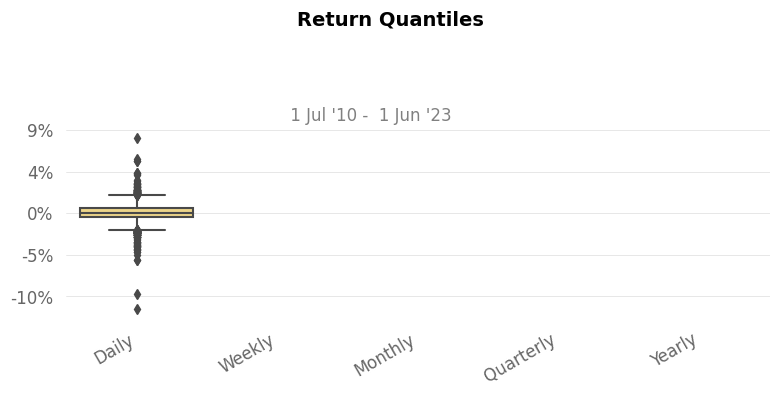

In [ ]:
#report about our initial portfolio performance
qs.reports.full(portfolio, benchmark = sp500)

Now let's try to opmtize our portfolio in two different approaches and check which will be better option to gain better results.

In [ ]:
azn_df = yf.download('AZN', start = '2010-07-01', end = '2023-06-02')
intel_df = yf.download('INTC', start = '2010-07-01', end = '2023-06-02')
hsbc_df = yf.download('HSBC', start = '2010-07-01', end = '2023-06-02')
mcd_df = yf.download('MCD', start = '2010-07-01', end = '2023-06-02')
nike_df = yf.download('NKE', start = '2010-07-01', end = '2023-06-02')
tm_df = yf.download('TM', start = '2010-07-01', end = '2023-06-02')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


We will be using Adjusted Close prices to our analysis

In [ ]:
# Extracting Adjusted Close for each stock
azn_df = azn_df['Adj Close']
intel_df = intel_df['Adj Close']
hsbc_df = hsbc_df['Adj Close']
mcd_df = mcd_df['Adj Close']
nike_df = nike_df['Adj Close']
tm_df = tm_df['Adj Close']

In [ ]:
adj = pd.concat([azn_df, intel_df, hsbc_df, mcd_df, nike_df, tm_df], join = 'outer', axis = 1)
adj.columns = ['Astra', 'Intel', 'HSBC', 'McDonald','Nike','Toyota']
adj

Astra      Intel       HSBC    McDonald        Nike  \
Date                                                                  
2010-07-01  13.991046  12.910232  23.893373   46.460941   14.594629   
2010-07-02  13.843925  12.876705  23.784081   46.063957   14.549604   
2010-07-06  14.055781  13.064492  24.117159   46.043068   14.410242   
2010-07-07  14.220551  13.507122  24.481461   46.878807   14.699687   
2010-07-08  14.350019  13.480297  24.715654   48.069763   15.068463   
...               ...        ...        ...         ...         ...   
2023-05-25  71.790001  27.400000  37.580002  284.012390  107.127373   
2023-05-26  72.519997  29.000000  37.820000  284.529663  107.157272   
2023-05-30  71.430000  29.990000  37.419998  283.415588  106.170517   
2023-05-31  73.080002  31.440001  36.820000  283.604553  104.914658   
2023-06-01  72.839996  31.129999  37.419998  286.350006  103.290001   

                Toyota  
Date                    
2010-07-01   58.906277  
2010-07-02   58.529003  
2010-07-06   60.046665  
2010-07-07   60.878399  
2010-07-08   61.058464  
...                ...  
2023-05-25  139.600006  
2023-05-26  140.080002  
2023-05-30  137.729996  
2023-05-31  136.130005  
2023-06-01  140.649994  

[3252 rows x 6 columns]

#Mean-Variance Optimalization model

To optimalize our portfolio using mean-variance model we need to create covariance matrix of our data frame and also calculate expected returns.

In [ ]:
# Calculating parameters required to Mean-Variance model
mu = expected_returns.mean_historical_return(adj) #expected returns
S = risk_models.sample_cov(adj) #Covariance matrix

Covariance Matrix

In [ ]:
S

Astra     Intel      HSBC  McDonald      Nike    Toyota
Astra     0.056528  0.021795  0.019790  0.014525  0.019134  0.016793
Intel     0.021795  0.089579  0.027904  0.020544  0.032741  0.026058
HSBC      0.019790  0.027904  0.060212  0.016769  0.024810  0.026477
McDonald  0.014525  0.020544  0.016769  0.035766  0.023239  0.015626
Nike      0.019134  0.032741  0.024810  0.023239  0.075988  0.024110
Toyota    0.016793  0.026058  0.026477  0.015626  0.024110  0.046416

We try to optimize portfolio for person who has conservative approach, so we want to minimalize volatility of our stocks. We using to this min_volatility() function

In [ ]:
# Optimizing for minimal volatility
ef = EfficientFrontier(mu, S) # Providing expected returns and covariance matrix as input
new_weights = ef.min_volatility() # Optimizing weights for minimal volatility

clean_weights = ef.clean_weights() # clean_weights rounds the weights and clips near-zeros

clean_weights

OrderedDict([('Astra', 0.20323),
             ('Intel', 0.01798),
             ('HSBC', 0.10023),
             ('McDonald', 0.42442),
             ('Nike', 0.02708),
             ('Toyota', 0.22707)])

We see that the model took the most shares for McDonalds and the least for Intel. Our initial analysis also found Intel to be the most volatile and McDonalds to be one of the least volatile, so it looks like our model worked.

Let's create new portflio with new weights and check whether it have better return than out initail portfolio

In [ ]:
cons_weights = [0.20323, 0.01798, 0.10023, 0.42442, 0.02708, 0.22707]
cons_portfolio = azn*cons_weights[0] + intel*cons_weights[1] + hsbc*cons_weights[2] + mcd*cons_weights[3] + nike*cons_weights[4] + tm*cons_weights[5]
cons_portfolio

Date
2010-07-01 04:00:00    0.008381
2010-07-02 04:00:00   -0.007806
2010-07-06 04:00:00    0.010212
2010-07-07 04:00:00    0.015899
2010-07-08 04:00:00    0.014907
                         ...   
2023-05-25 04:00:00   -0.002037
2023-05-26 04:00:00    0.005318
2023-05-30 04:00:00   -0.009221
2023-05-31 04:00:00    0.001282
2023-06-01 04:00:00    0.012017
Name: Close, Length: 3252, dtype: float64

[Performance Metrics]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2010-07-01  2010-07-01
End Period                 2023-06-01  2023-06-01
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          381.49%     309.53%
CAGR﹪                     12.93%      11.52%

Sharpe                     0.86        0.71
Prob. Sharpe Ratio         99.88%      99.4%
Smart Sharpe               0.76        0.63
Sortino                    1.22        0.99
Smart Sortino              1.08        0.88
Sortino/√2                 0.86        0.7
Smart Sortino/√2           0.77        0.62
Omega                      1.17        1.17

Max Drawdown               -28.66%     -33.92%
Longest DD Days            440         512
Volatility (ann.)          15.61%      17.62%
R^2                        0.65        0.65
Information Ratio          0.01        0.01
Calmar          

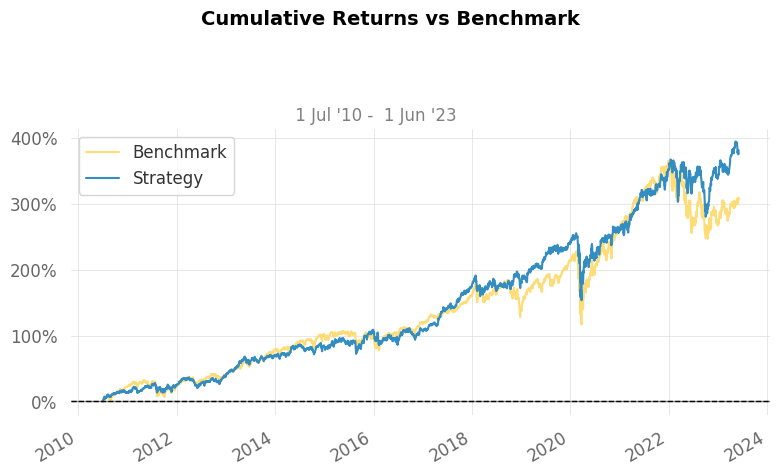

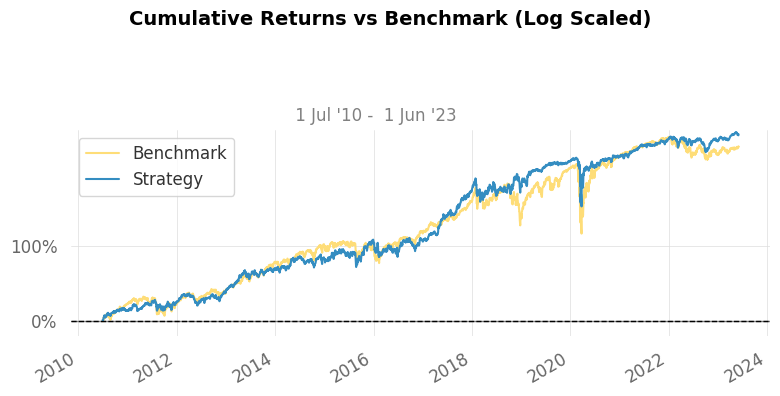

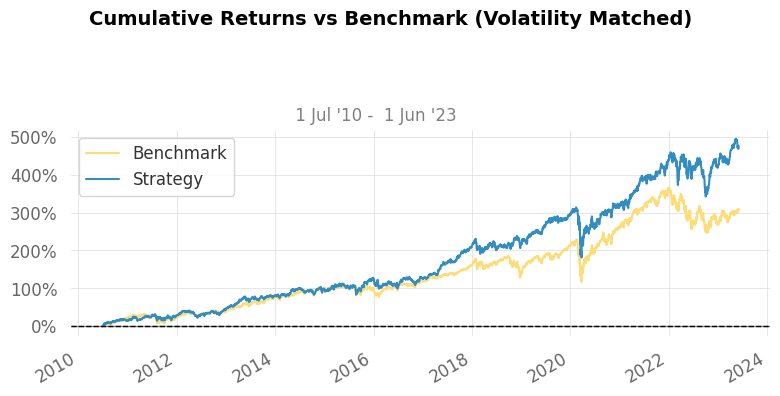

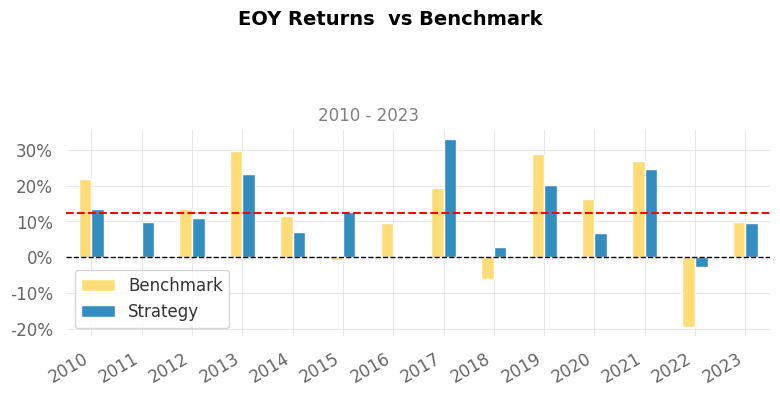

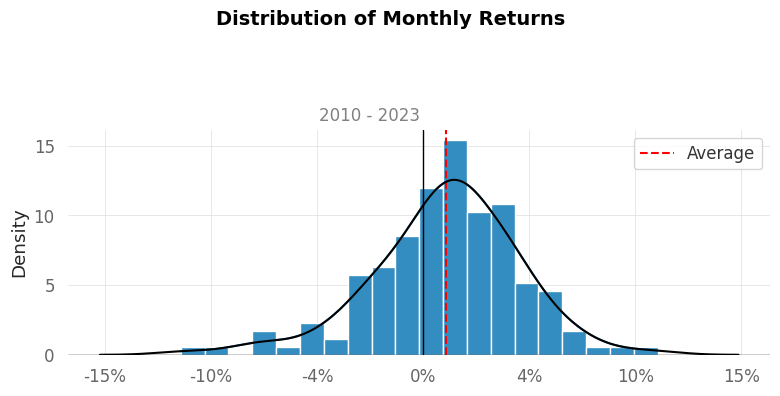

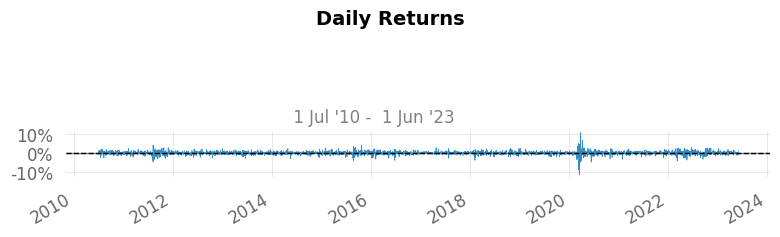

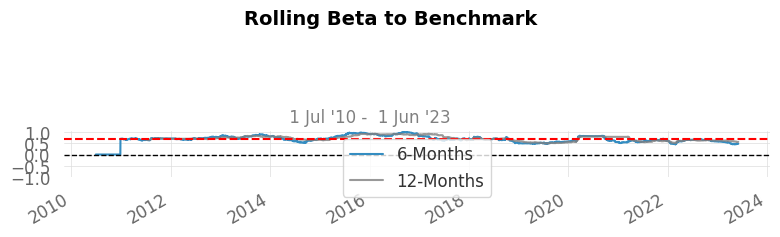

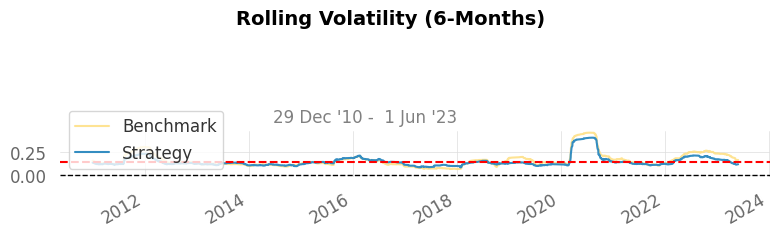

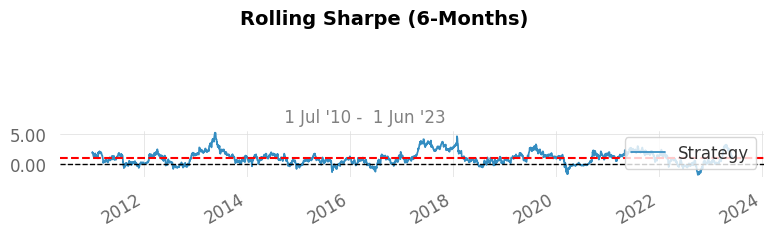

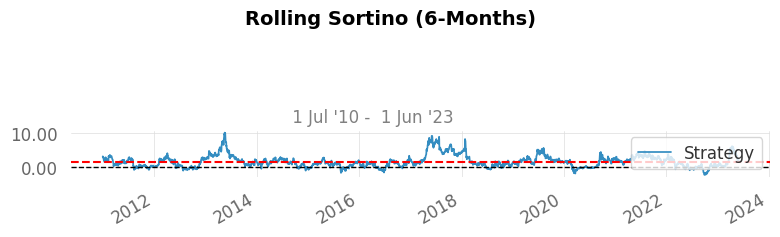

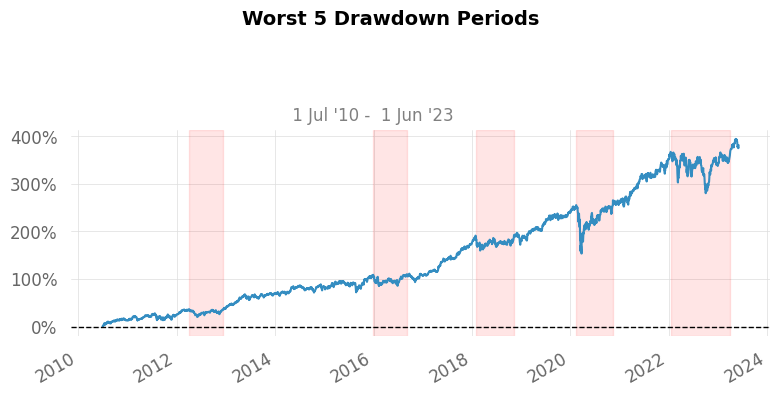

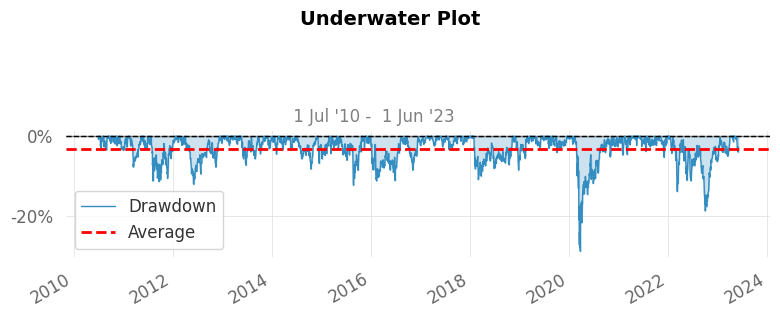

/usr/local/lib/python3.10/dist-packages/quantstats/stats.py:968: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



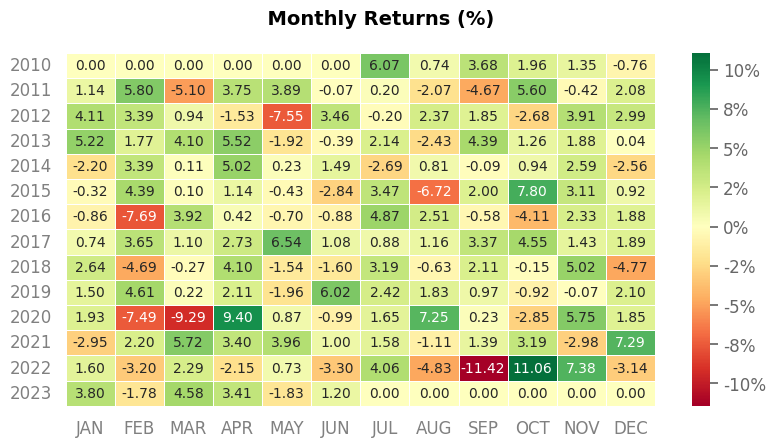

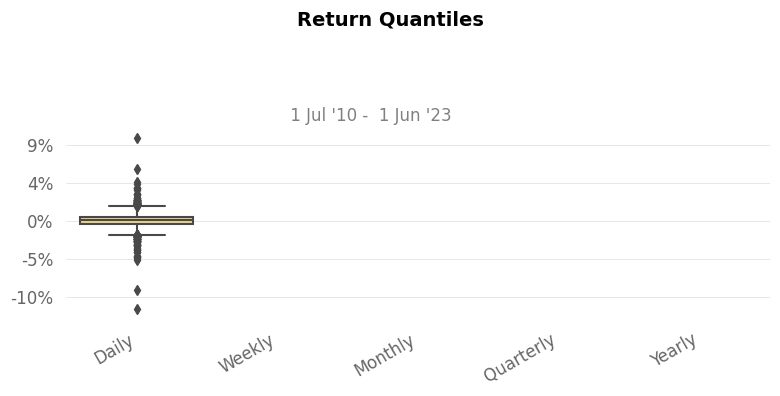

In [ ]:
#report about our conservative portfolio performance
qs.reports.full(cons_portfolio, benchmark = sp500)

We see that conservative approach has lower volatility and better cumulative return than initial portfolio

Now we try to optimize portfolio for person who has aggressive approach

To do this first we need to check how look like our volatility for each stocks

In [ ]:
Volatility = {'Astra': qs.stats.volatility(azn), 'Intel':qs.stats.volatility(intel), 'HSBC': qs.stats.volatility(hsbc),
              'McDonalds': qs.stats.volatility(mcd), 'Nike': qs.stats.volatility(nike),'Toyota': qs.stats.volatility(tm)}
Volatility

{'Astra': 0.23773008034204596,
 'Intel': 0.29926661581873154,
 'HSBC': 0.24535006651313998,
 'McDonalds': 0.18912106922923003,
 'Nike': 0.2756239965034083,
 'Toyota': 0.215410083291047}

Intel has the biggest volatility of our conider stocks. McDonald's has the lowest volatility.

In [ ]:
# Optimizing for maximal return for given target risk
ef = EfficientFrontier(mu, S) # Providing expected returns and covariance matrix as input
new_weights = ef.efficient_risk(0.22) # Optimizing weights for Sharpe ratio maximization

clean_weights = ef.clean_weights() # clean_weights rounds the weights and clips near-zeros

clean_weights

OrderedDict([('Astra', 0.0),
             ('Intel', 0.0),
             ('HSBC', 0.0),
             ('McDonald', 0.32812),
             ('Nike', 0.67188),
             ('Toyota', 0.0)])

Due to the adopted higher volatility threshold (+50% volatility from prevoius approach), our model estimated to take into account a larger number of Nike stocks to maximize the return

In [ ]:
aggr_weights = [0.328112, 0.67188]
aggr_portfolio = mcd*aggr_weights[0]+nike*aggr_weights[1]
aggr_portfolio

Date
2010-07-01 04:00:00    0.009356
2010-07-02 04:00:00   -0.004876
2010-07-06 04:00:00   -0.006584
2010-07-07 04:00:00    0.019451
2010-07-08 04:00:00    0.025191
                         ...   
2023-05-25 04:00:00   -0.005485
2023-05-26 04:00:00    0.000785
2023-05-30 04:00:00   -0.007472
2023-05-31 04:00:00   -0.007729
2023-06-01 04:00:00   -0.007228
Name: Close, Length: 3252, dtype: float64

[Performance Metrics]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2010-07-01  2010-07-01
End Period                 2023-06-01  2023-06-01
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          648.15%     309.53%
CAGR﹪                     16.85%      11.52%

Sharpe                     0.82        0.71
Prob. Sharpe Ratio         99.84%      99.4%
Smart Sharpe               0.77        0.67
Sortino                    1.21        0.99
Smart Sortino              1.14        0.93
Sortino/√2                 0.86        0.7
Smart Sortino/√2           0.81        0.66
Omega                      1.17        1.17

Max Drawdown               -40.36%     -33.92%
Longest DD Days            569         512
Volatility (ann.)          22.0%       17.62%
R^2                        0.51        0.51
Information Ratio          0.02        0.02
Calmar          

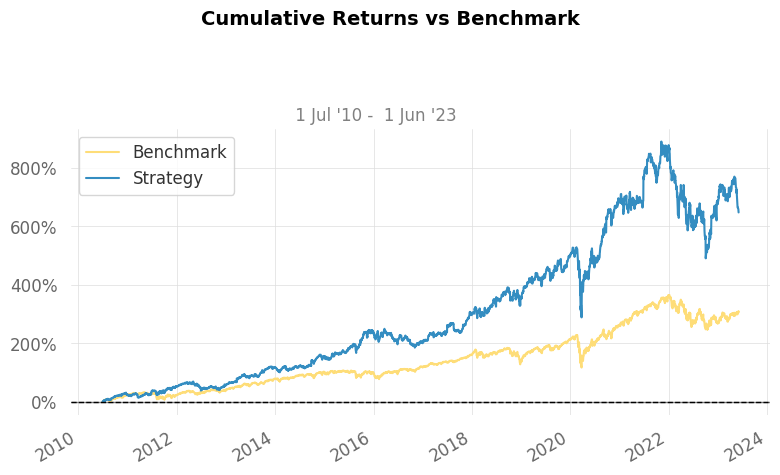

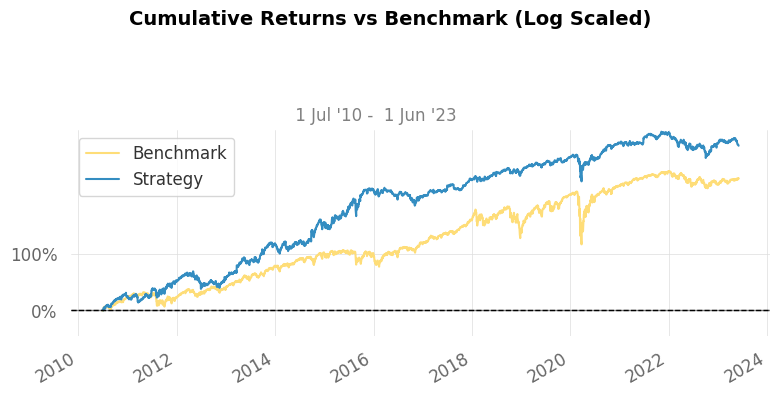

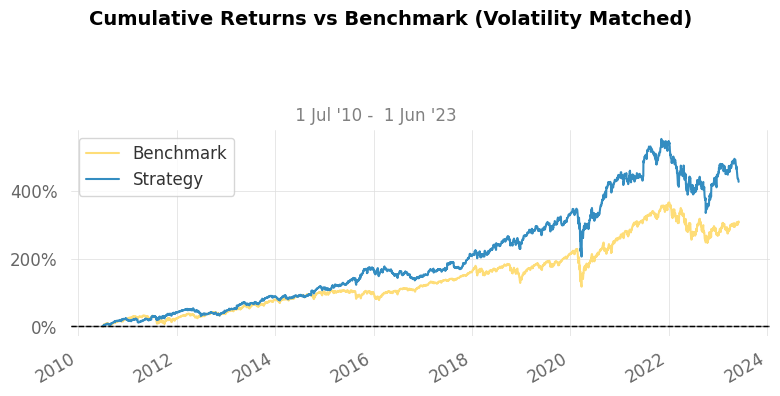

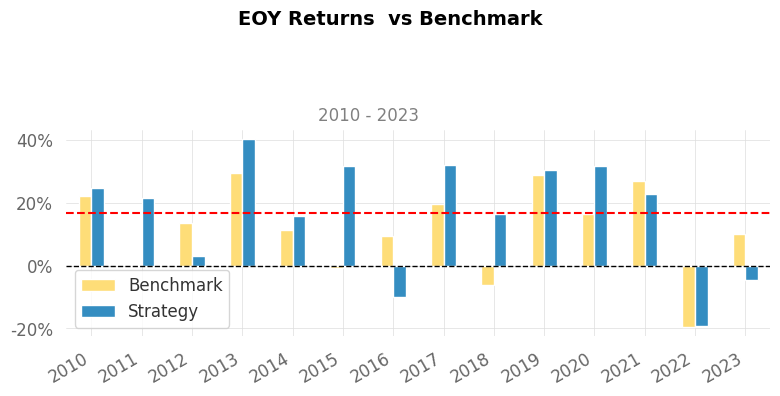

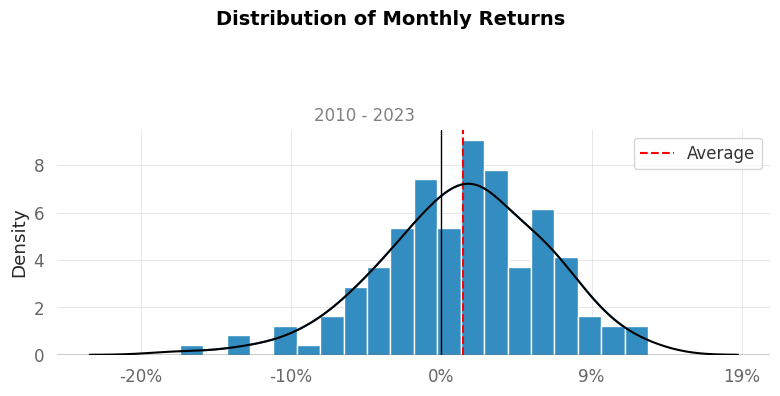

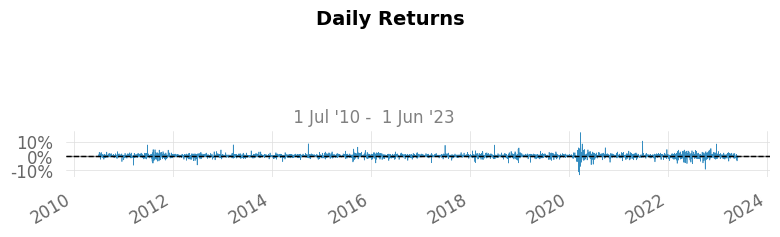

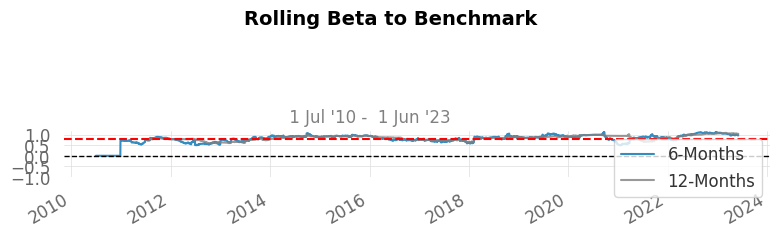

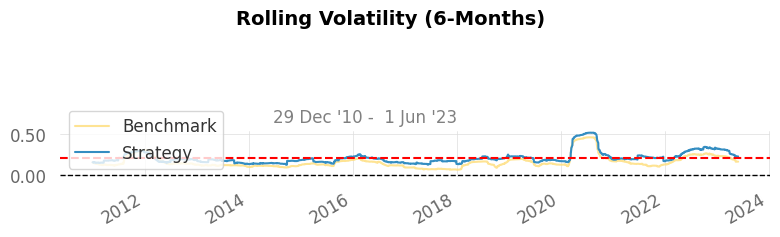

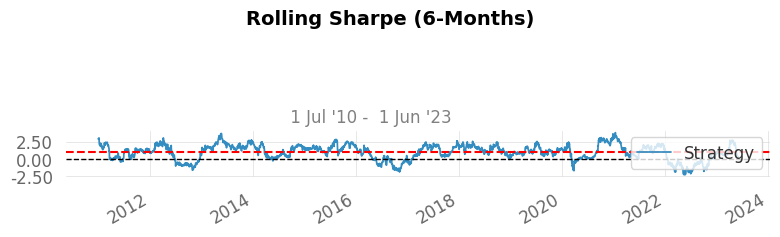

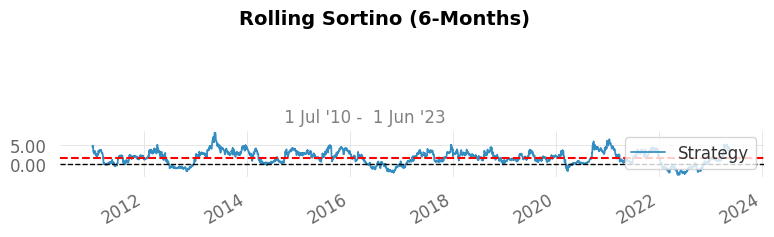

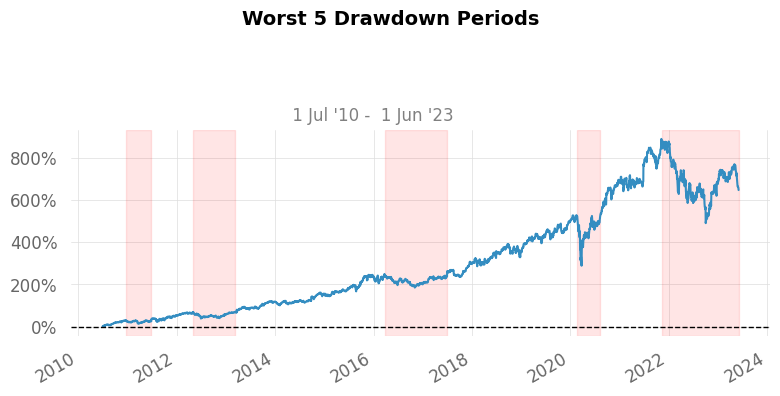

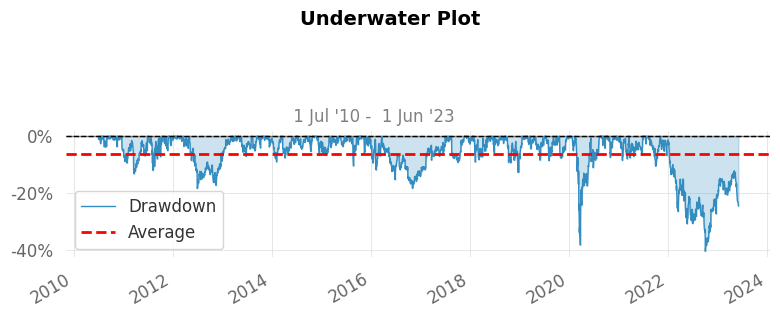

/usr/local/lib/python3.10/dist-packages/quantstats/stats.py:968: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



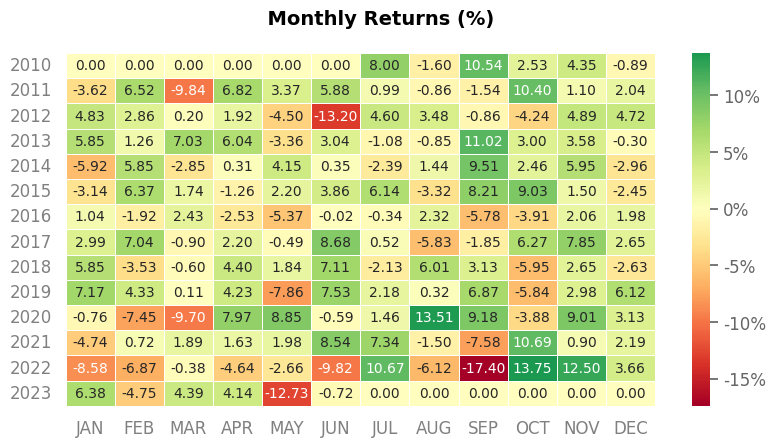

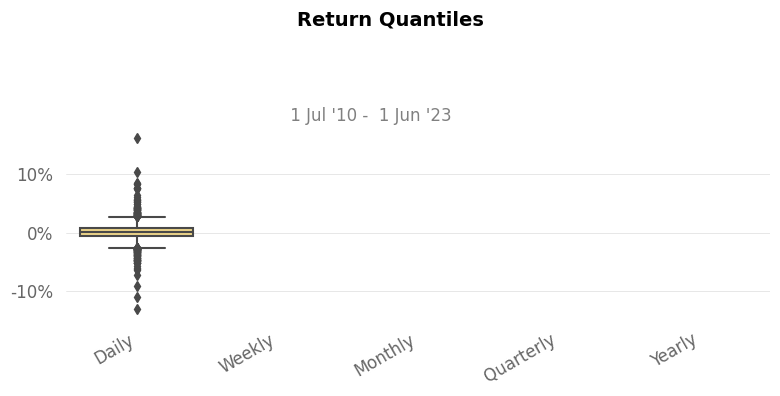

In [ ]:
#report about our aggresive portfolio performance
qs.reports.full(aggr_portfolio, benchmark = sp500)

Let's compare two consider approach

[Performance Metrics]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2010-07-01  2010-07-01
End Period                 2023-06-01  2023-06-01
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          648.15%     381.49%
CAGR﹪                     16.85%      12.93%

Sharpe                     0.82        0.86
Prob. Sharpe Ratio         99.84%      99.88%
Smart Sharpe               0.77        0.81
Sortino                    1.21        1.22
Smart Sortino              1.14        1.15
Sortino/√2                 0.86        0.86
Smart Sortino/√2           0.81        0.81
Omega                      1.17        1.17

Max Drawdown               -40.36%     -28.66%
Longest DD Days            569         440
Volatility (ann.)          22.0%       15.61%
R^2                        0.5         0.5
Information Ratio          0.02        0.02
Calmar         

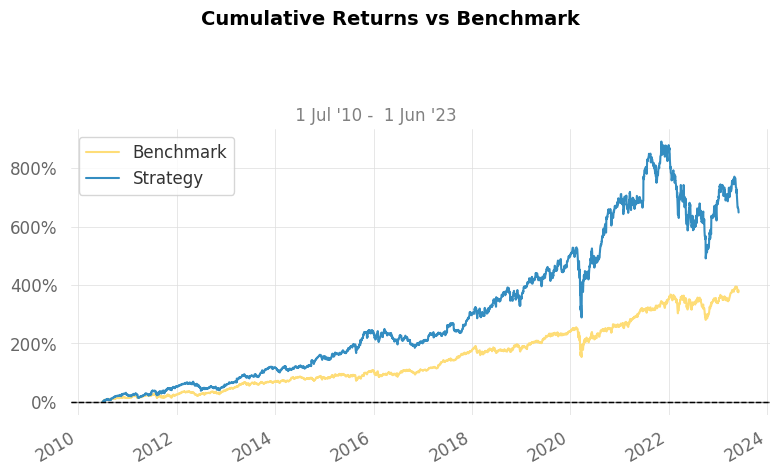

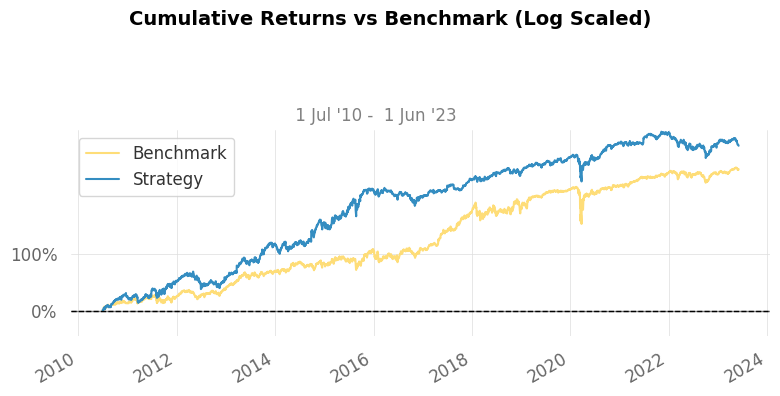

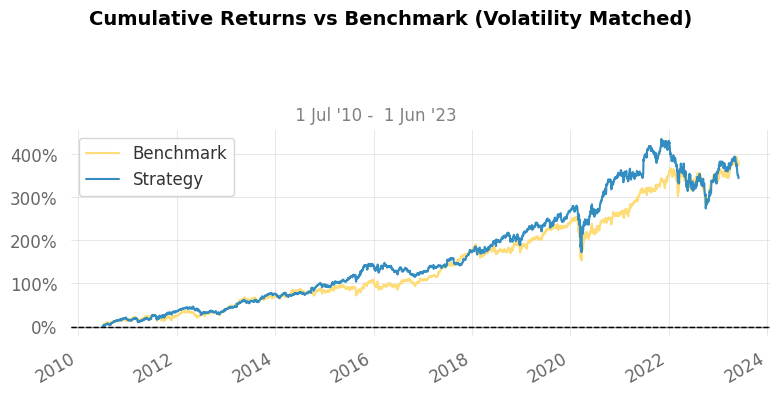

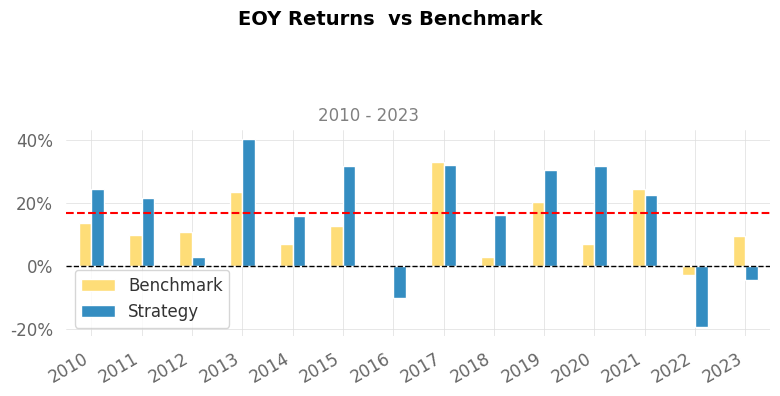

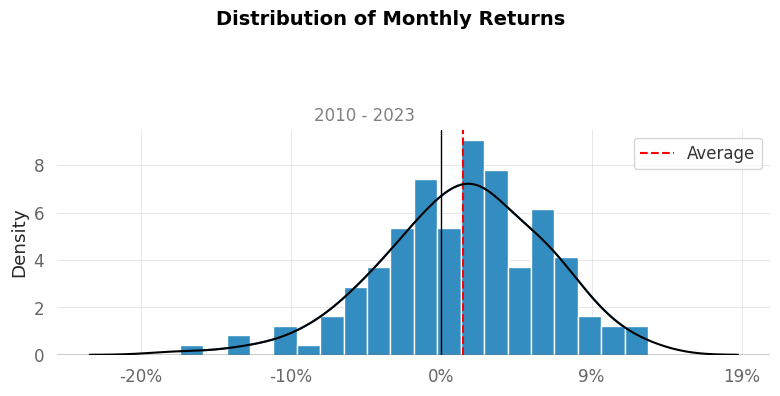

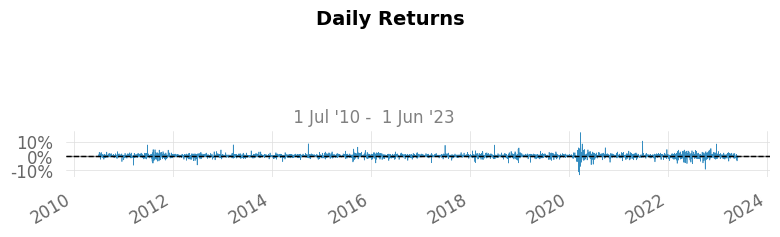

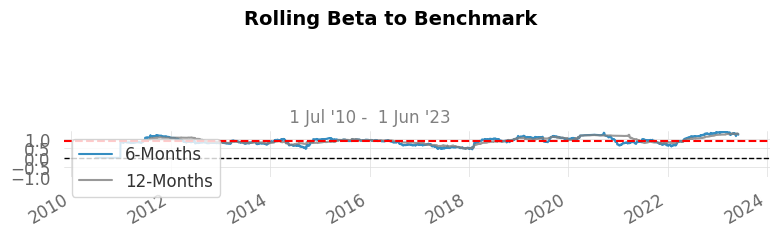

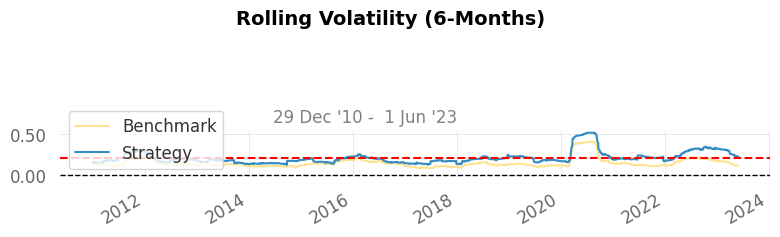

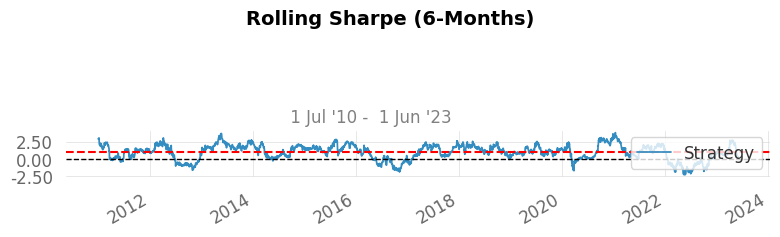

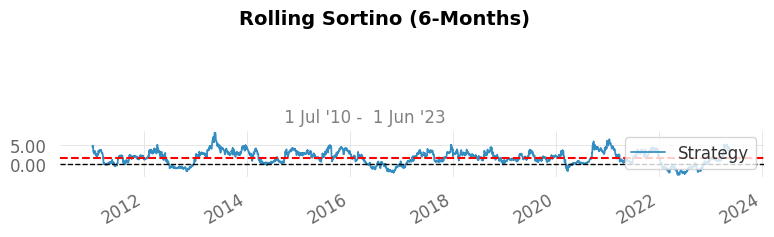

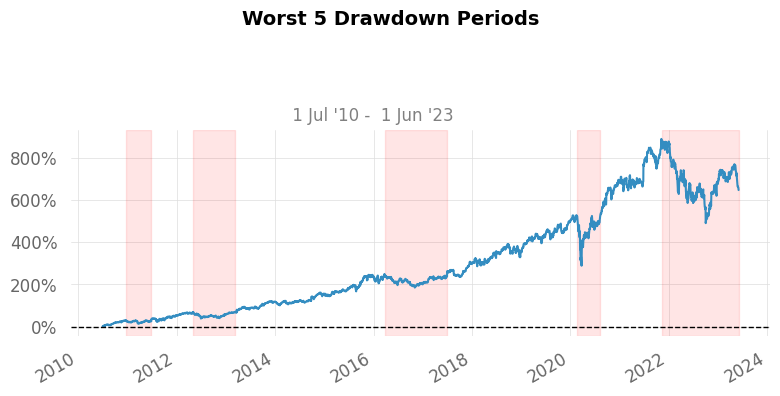

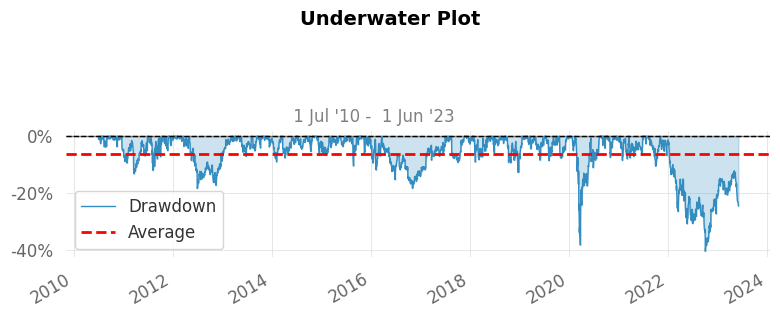

/usr/local/lib/python3.10/dist-packages/quantstats/stats.py:968: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



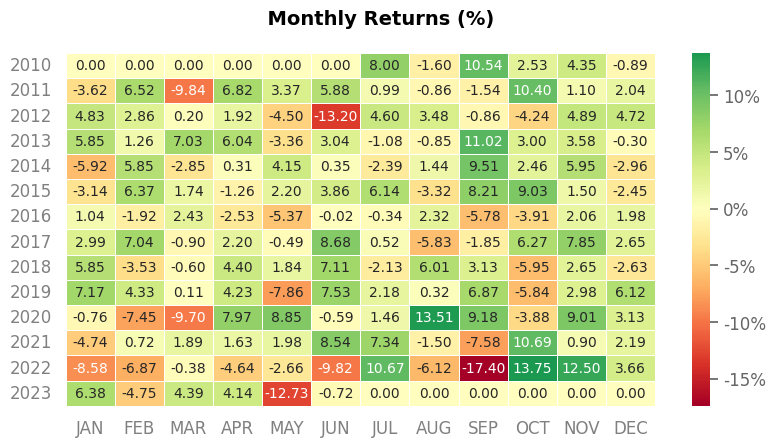

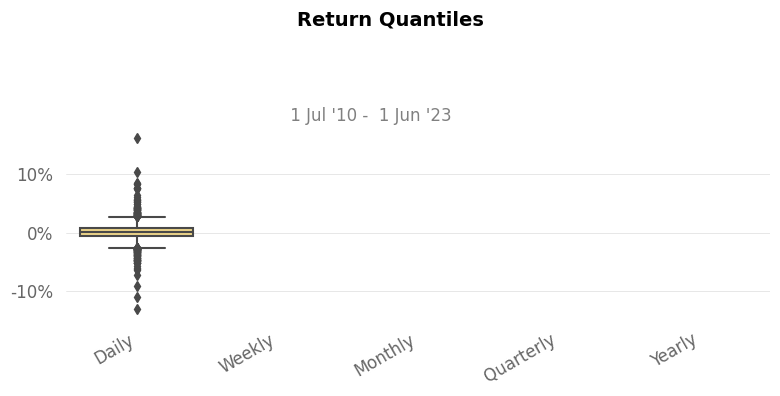

In [ ]:
#comparison aggresive approach with conservative approach
qs.reports.full(aggr_portfolio, cons_portfolio)

That means, aggerisve approach has better cumulative returns than conservative approach

#Neural network

Dividing data into train and test subset in proporion 80:20

In [ ]:
azn_train = azn_df[0:2600]
intel_train = intel_df[0:2600]
hsbc_train = hsbc_df[0:2600]
mcd_train = mcd_df[0:2600]
nike_train = nike_df[0:2600]
tm_train = tm_df[0:2600]

azn_test = azn_df[2601:]
intel_test = intel_df[2601:]
hsbc_test = hsbc_df[2601:]
mcd_test = mcd_df[2601:]
nike_test = nike_df[2601:]
tm_test = tm_df[2601:]

Creating function to divide data into subset X and Y

In [ ]:
def genXY(shares, seq_len):
        """
        Generates training and test data
        :param seq_len: length of window
        :return: Transform data to X and Y subset
        """
        pom_X=[]
        pom_Y=[]
        X=[]
        Y=[]
        for i in range((len(shares)//seq_len)*seq_len - seq_len - 1):
            x = np.array(shares[i: i + seq_len])
            y = np.array([shares[i + seq_len + 1]], np.float64)
            pom_X.append(x)
            pom_Y.append(y)
        X = np.array(pom_X) /300
        Y = np.array(pom_Y) /300
        return X, Y

Train and test sets

In [ ]:
X_train_azn, Y_train_azn = genXY(azn_train, 10)
X_train_intel, Y_train_intel = genXY(intel_train, 10)
X_train_hsbc, Y_train_hsbc = genXY(hsbc_train, 10)
X_train_mcd, Y_train_mcd = genXY(mcd_train, 10)
X_train_nike, Y_train_nike = genXY(nike_train, 10)
X_train_tm, Y_train_tm = genXY(tm_train, 10)

X_test_azn, Y_test_azn = genXY(azn_test, 10)
X_test_intel, Y_test_intel = genXY(intel_test, 10)
X_test_hsbc, Y_test_hsbc = genXY(hsbc_test, 10)
X_test_mcd, Y_test_mcd = genXY(mcd_test, 10)
X_test_nike, Y_test_nike = genXY(nike_test, 10)
X_test_tm, Y_test_tm = genXY(tm_test, 10)

##Multilayer perception

In [ ]:
MLP = tf.keras.models.Sequential()
MLP.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
MLP.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
MLP.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

MLP.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
MLP.fit(X_train_azn, Y_train_azn, epochs=100)
MLP.evaluate(X_test_azn, Y_test_azn)

X_predict_azn,Y_predict = genXY(azn_df,10)
X_mlp_azn = MLP.predict(X_predict_azn)*300

Epoch 1/100
81/81 [==============================] - 1s 2ms/step - loss: 2.2021e-04
Epoch 2/100
81/81 [==============================] - 0s 2ms/step - loss: 7.8119e-06
Epoch 3/100
81/81 [==============================] - 0s 2ms/step - loss: 7.3625e-06
Epoch 4/100
81/81 [==============================] - 0s 2ms/step - loss: 7.6820e-06
Epoch 5/100
81/81 [==============================] - 0s 2ms/step - loss: 7.2683e-06
Epoch 6/100
81/81 [==============================] - 0s 2ms/step - loss: 7.1990e-06
Epoch 7/100
81/81 [==============================] - 0s 2ms/step - loss: 7.0878e-06
Epoch 8/100
81/81 [==============================] - 0s 2ms/step - loss: 6.9905e-06
Epoch 9/100
81/81 [==============================] - 0s 2ms/step - loss: 6.1791e-06
Epoch 10/100
81/81 [==============================] - 0s 2ms/step - loss: 6.3611e-06
Epoch 11/100
81/81 [==============================] - 0s 2ms/step - loss: 6.3093e-06
Epoch 12/100
81/81 [==============================] - 0s 2ms/step - loss: 

In [ ]:
MLP.fit(X_train_intel, Y_train_intel, epochs=100)
MLP.evaluate(X_test_intel, Y_test_intel)

X_predict_intel,Y_predict = genXY(intel_df,10)
X_mlp_intel = MLP.predict(X_predict_intel)*300

Epoch 1/100
81/81 [==============================] - 0s 2ms/step - loss: 1.2659e-05
Epoch 2/100
81/81 [==============================] - 0s 2ms/step - loss: 1.3296e-05
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 1.1562e-05
Epoch 4/100
81/81 [==============================] - 1s 7ms/step - loss: 1.1632e-05
Epoch 5/100
81/81 [==============================] - 1s 9ms/step - loss: 1.3081e-05
Epoch 6/100
81/81 [==============================] - 0s 5ms/step - loss: 9.9553e-06
Epoch 7/100
81/81 [==============================] - 1s 8ms/step - loss: 1.0598e-05
Epoch 8/100
81/81 [==============================] - 1s 8ms/step - loss: 1.1202e-05
Epoch 9/100
81/81 [==============================] - 0s 6ms/step - loss: 9.8967e-06
Epoch 10/100
81/81 [==============================] - 0s 4ms/step - loss: 1.0683e-05
Epoch 11/100
81/81 [==============================] - 1s 13ms/step - loss: 1.2228e-05
Epoch 12/100
81/81 [==============================] - 1s 14ms/step - loss

In [ ]:
MLP.fit(X_train_hsbc, Y_train_hsbc, epochs=100)
MLP.evaluate(X_test_hsbc, Y_test_hsbc)

X_predict_hsbc,Y_predict = genXY(hsbc_df,10)
X_mlp_hsbc = MLP.predict(X_predict_hsbc)*300

Epoch 1/100
81/81 [==============================] - 0s 2ms/step - loss: 3.9039e-06
Epoch 2/100
81/81 [==============================] - 0s 2ms/step - loss: 4.0145e-06
Epoch 3/100
81/81 [==============================] - 0s 2ms/step - loss: 4.0818e-06
Epoch 4/100
81/81 [==============================] - 0s 2ms/step - loss: 3.7986e-06
Epoch 5/100
81/81 [==============================] - 0s 2ms/step - loss: 3.8904e-06
Epoch 6/100
81/81 [==============================] - 0s 2ms/step - loss: 3.8415e-06
Epoch 7/100
81/81 [==============================] - 0s 2ms/step - loss: 3.8416e-06
Epoch 8/100
81/81 [==============================] - 0s 2ms/step - loss: 3.6406e-06
Epoch 9/100
81/81 [==============================] - 0s 2ms/step - loss: 4.1726e-06
Epoch 10/100
81/81 [==============================] - 0s 2ms/step - loss: 4.3124e-06
Epoch 11/100
81/81 [==============================] - 0s 2ms/step - loss: 3.7652e-06
Epoch 12/100
81/81 [==============================] - 0s 2ms/step - loss: 

In [ ]:
MLP.fit(X_train_mcd, Y_train_mcd, epochs=100)
MLP.evaluate(X_test_mcd, Y_test_mcd)

X_predict_mcd,Y_predict = genXY(mcd_df,10)
X_mlp_mcd = MLP.predict(X_predict_mcd)*300

Epoch 1/100
81/81 [==============================] - 0s 2ms/step - loss: 2.4950e-04
Epoch 2/100
81/81 [==============================] - 0s 2ms/step - loss: 6.2998e-05
Epoch 3/100
81/81 [==============================] - 0s 2ms/step - loss: 5.9542e-05
Epoch 4/100
81/81 [==============================] - 0s 2ms/step - loss: 5.9667e-05
Epoch 5/100
81/81 [==============================] - 0s 2ms/step - loss: 6.3565e-05
Epoch 6/100
81/81 [==============================] - 0s 2ms/step - loss: 5.7359e-05
Epoch 7/100
81/81 [==============================] - 0s 2ms/step - loss: 6.6295e-05
Epoch 8/100
81/81 [==============================] - 0s 2ms/step - loss: 5.6053e-05
Epoch 9/100
81/81 [==============================] - 0s 2ms/step - loss: 5.6857e-05
Epoch 10/100
81/81 [==============================] - 0s 2ms/step - loss: 5.8412e-05
Epoch 11/100
81/81 [==============================] - 0s 2ms/step - loss: 5.5502e-05
Epoch 12/100
81/81 [==============================] - 0s 2ms/step - loss: 

In [ ]:
MLP.fit(X_train_nike, Y_train_nike, epochs=100)
MLP.evaluate(X_test_nike, Y_test_nike)

X_predict_nike,Y_predict = genXY(nike_df,10)
X_mlp_nike = MLP.predict(X_predict_nike)*300

Epoch 1/100
81/81 [==============================] - 0s 2ms/step - loss: 2.6420e-05
Epoch 2/100
81/81 [==============================] - 0s 2ms/step - loss: 2.1628e-05
Epoch 3/100
81/81 [==============================] - 0s 2ms/step - loss: 2.2525e-05
Epoch 4/100
81/81 [==============================] - 0s 2ms/step - loss: 2.1694e-05
Epoch 5/100
81/81 [==============================] - 0s 3ms/step - loss: 2.1542e-05
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 2.2165e-05
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 2.1488e-05
Epoch 8/100
81/81 [==============================] - 0s 3ms/step - loss: 2.2278e-05
Epoch 9/100
81/81 [==============================] - 0s 3ms/step - loss: 2.1358e-05
Epoch 10/100
81/81 [==============================] - 0s 3ms/step - loss: 2.1216e-05
Epoch 11/100
81/81 [==============================] - 0s 3ms/step - loss: 2.0927e-05
Epoch 12/100
81/81 [==============================] - 0s 3ms/step - loss: 

In [ ]:
MLP.fit(X_train_tm, Y_train_tm, epochs=100)
MLP.evaluate(X_test_tm, Y_test_tm)

X_predict_tm,Y_predict = genXY(tm_df,10)
X_mlp_tm = MLP.predict(X_predict_tm)*300

Epoch 1/100
81/81 [==============================] - 0s 2ms/step - loss: 5.1034e-05
Epoch 2/100
81/81 [==============================] - 0s 2ms/step - loss: 5.2231e-05
Epoch 3/100
81/81 [==============================] - 0s 2ms/step - loss: 4.7809e-05
Epoch 4/100
81/81 [==============================] - 0s 2ms/step - loss: 4.7526e-05
Epoch 5/100
81/81 [==============================] - 0s 2ms/step - loss: 4.4805e-05
Epoch 6/100
81/81 [==============================] - 0s 2ms/step - loss: 4.8949e-05
Epoch 7/100
81/81 [==============================] - 0s 2ms/step - loss: 5.1357e-05
Epoch 8/100
81/81 [==============================] - 0s 2ms/step - loss: 5.0894e-05
Epoch 9/100
81/81 [==============================] - 0s 2ms/step - loss: 4.3455e-05
Epoch 10/100
81/81 [==============================] - 0s 2ms/step - loss: 4.5357e-05
Epoch 11/100
81/81 [==============================] - 0s 2ms/step - loss: 4.3661e-05
Epoch 12/100
81/81 [==============================] - 0s 2ms/step - loss: 

Original data

In [ ]:
azn_og=np.array(azn_df)
azn_og=azn_og[9:]

intel_og=np.array(intel_df)
intel_og=intel_og[9:]

hsbc_og=np.array(hsbc_df)
hsbc_og=hsbc_og[9:]

mcd_og=np.array(mcd_df)
mcd_og=mcd_og[9:]

nike_og=np.array(nike_df)
nike_og=nike_og[9:]

tm_og=np.array(tm_df)
tm_og=tm_og[9:]

Comparing results on plots

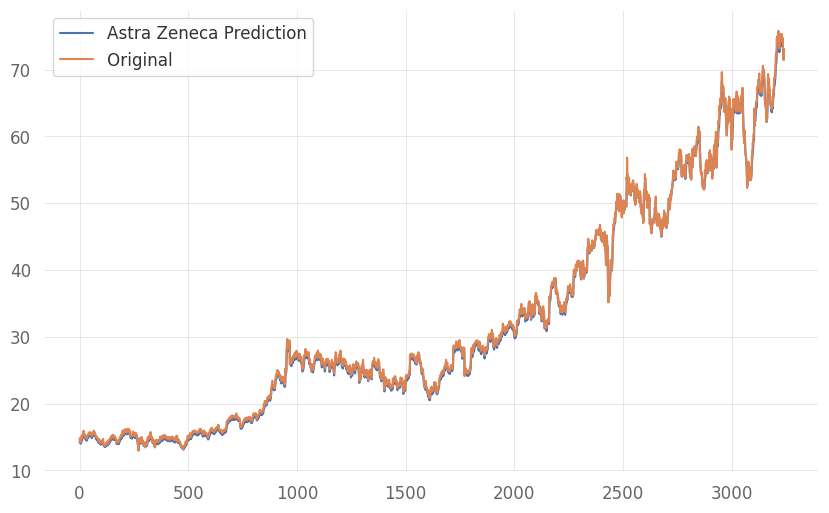

In [ ]:
plt.plot(X_mlp_azn, label='Astra Zeneca Prediction')
plt.plot(azn_og, label='Original')
plt.legend()

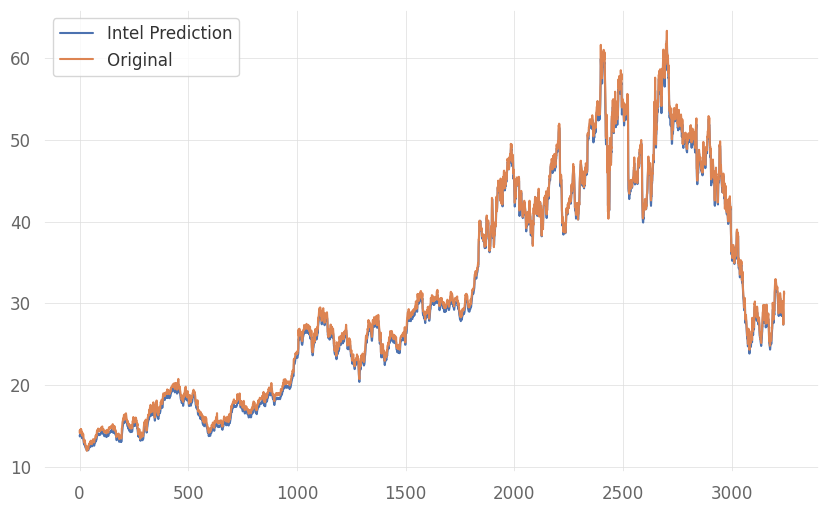

In [ ]:
plt.plot(X_mlp_intel, label='Intel Prediction')
plt.plot(intel_og, label='Original')
plt.legend()

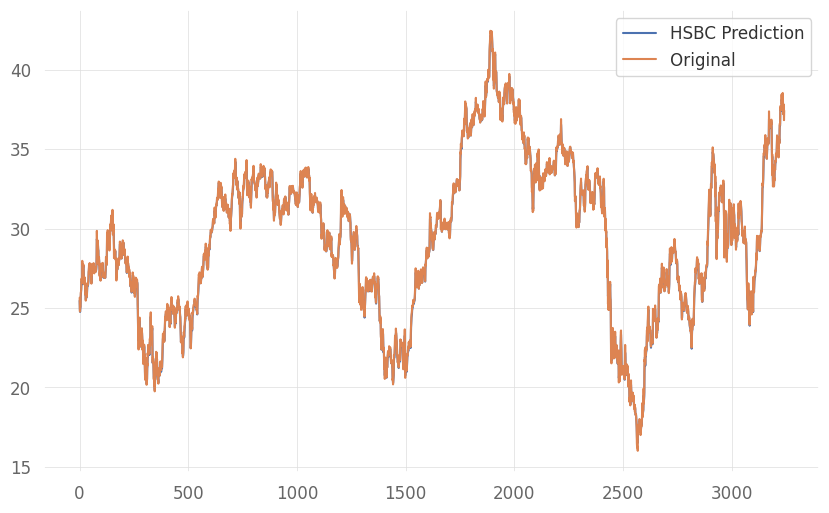

In [ ]:
plt.plot(X_mlp_hsbc, label='HSBC Prediction')
plt.plot(hsbc_og, label='Original')
plt.legend()

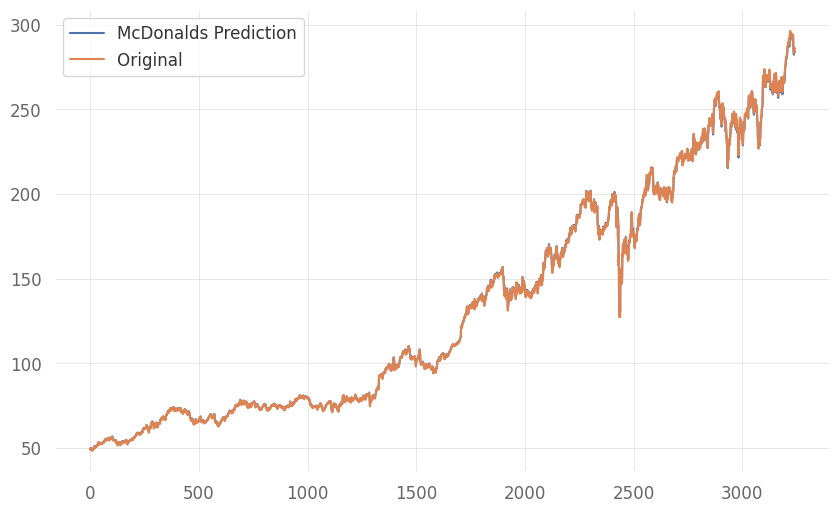

In [ ]:
plt.plot(X_mlp_mcd, label='McDonalds Prediction')
plt.plot(mcd_og, label='Original')
plt.legend()

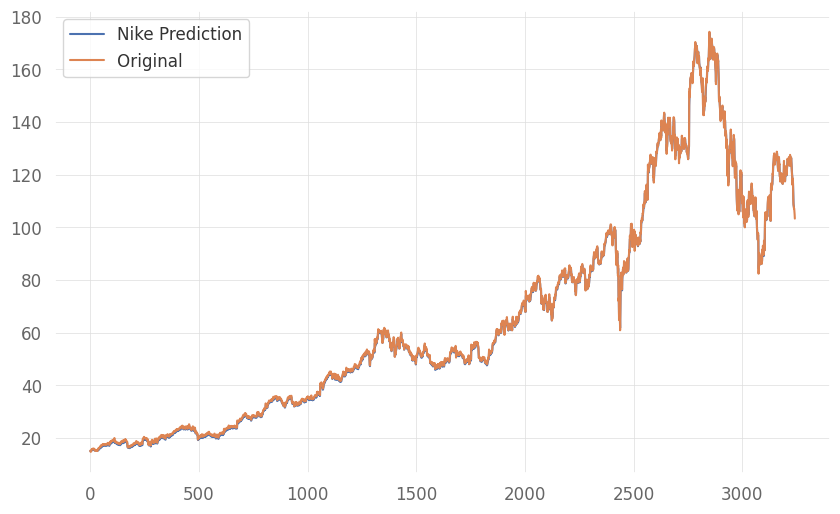

In [ ]:
plt.plot(X_mlp_nike, label='Nike Prediction')
plt.plot(nike_og, label='Original')
plt.legend()

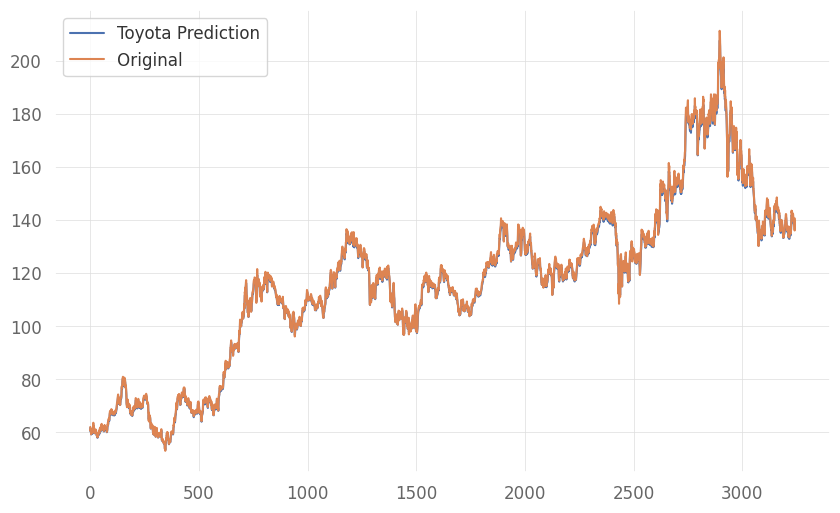

In [ ]:
plt.plot(X_mlp_tm, label='Toyota Prediction')
plt.plot(tm_og, label='Original')
plt.legend()

More detailed plots in selected period

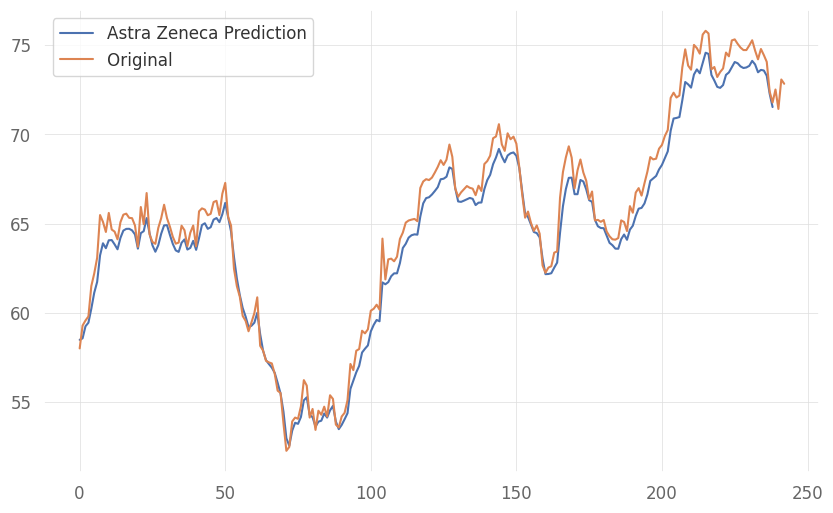

In [ ]:
plt.plot(X_mlp_azn[3000:], label='Astra Zeneca Prediction')
plt.plot(azn_og[3000:], label='Original')
plt.legend()

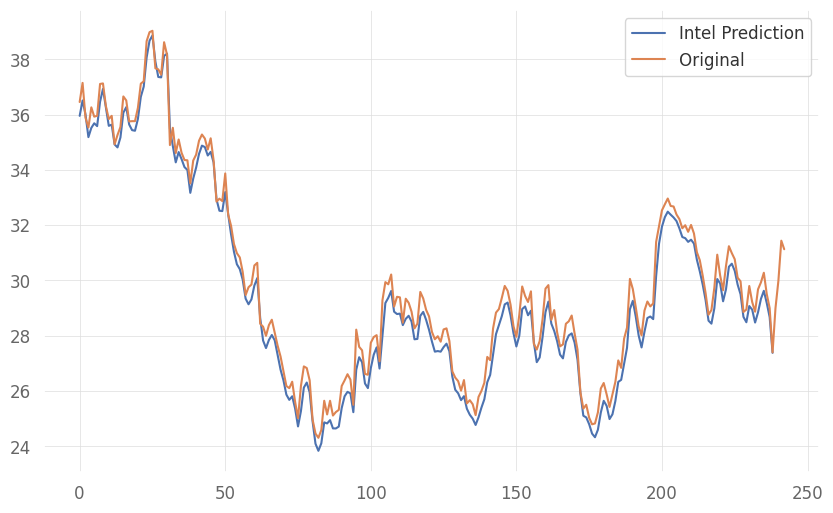

In [ ]:
plt.plot(X_mlp_intel[3000:], label='Intel Prediction')
plt.plot(intel_og[3000:], label='Original')
plt.legend()

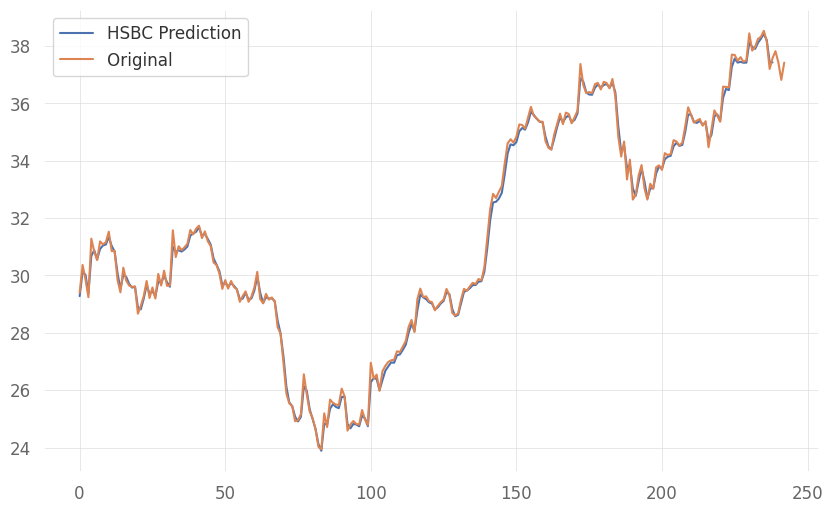

In [ ]:
plt.plot(X_mlp_hsbc[3000:], label='HSBC Prediction')
plt.plot(hsbc_og[3000:], label='Original')
plt.legend()

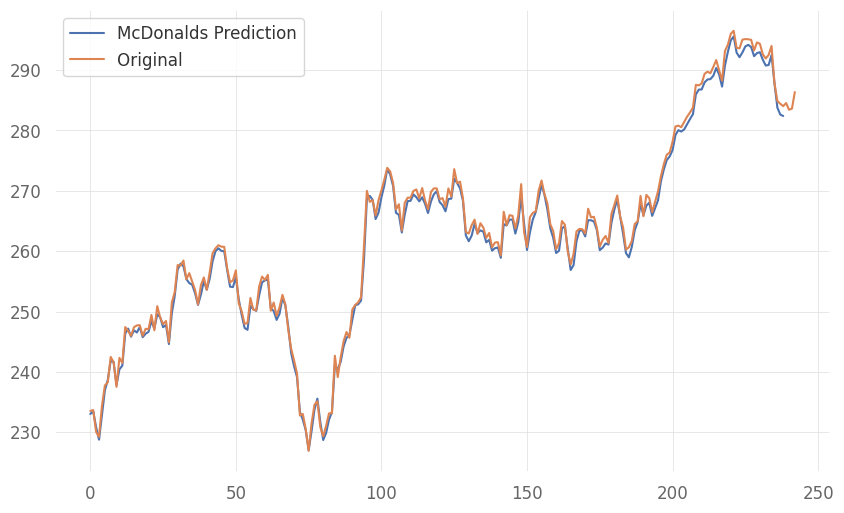

In [ ]:
plt.plot(X_mlp_mcd[3000:], label='McDonalds Prediction')
plt.plot(mcd_og[3000:], label='Original')
plt.legend()

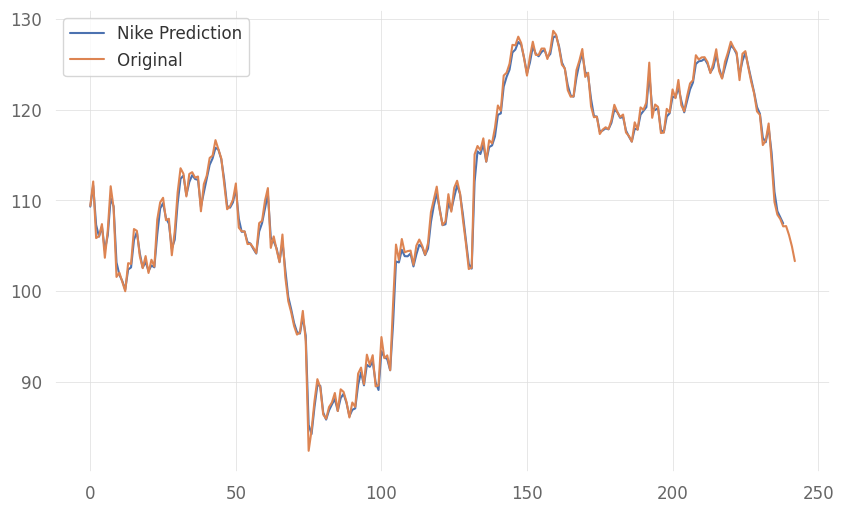

In [ ]:
plt.plot(X_mlp_nike[3000:], label='Nike Prediction')
plt.plot(nike_og[3000:], label='Original')
plt.legend()

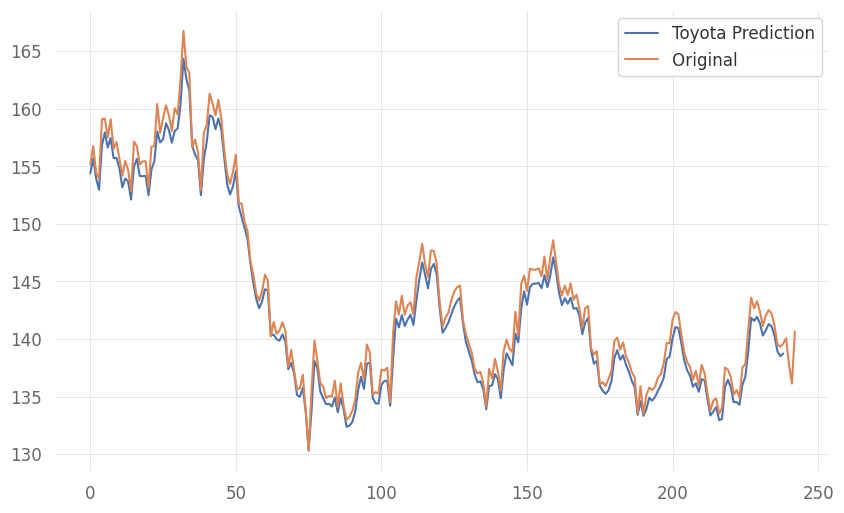

In [ ]:
plt.plot(X_mlp_tm[3000:], label='Toyota Prediction')
plt.plot(tm_og[3000:], label='Original')
plt.legend()

##LSTM

In [ ]:
LSTM = tf.keras.Sequential()
LSTM.add(tf.keras.layers.LSTM(20, input_shape=(10, 1), return_sequences=True))
LSTM.add(tf.keras.layers.LSTM(20))
LSTM.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

LSTM.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
LSTM.fit(X_train_azn, Y_train_azn, epochs=50)
LSTM.evaluate(X_test_azn, Y_test_azn)

X_lstm_azn,Y_lstm = genXY(azn_df,10)
X_lstm_azn_end = LSTM.predict(X_lstm_azn)*300

Epoch 1/50
81/81 [==============================] - 5s 12ms/step - loss: 7.2206e-04
Epoch 2/50
81/81 [==============================] - 1s 17ms/step - loss: 1.1474e-05
Epoch 3/50
81/81 [==============================] - 1s 16ms/step - loss: 1.1292e-05
Epoch 4/50
81/81 [==============================] - 1s 12ms/step - loss: 1.1300e-05
Epoch 5/50
81/81 [==============================] - 1s 12ms/step - loss: 1.1179e-05
Epoch 6/50
81/81 [==============================] - 1s 11ms/step - loss: 1.1663e-05
Epoch 7/50
81/81 [==============================] - 1s 11ms/step - loss: 1.1320e-05
Epoch 8/50
81/81 [==============================] - 1s 11ms/step - loss: 1.1397e-05
Epoch 9/50
81/81 [==============================] - 1s 12ms/step - loss: 1.1902e-05
Epoch 10/50
81/81 [==============================] - 1s 12ms/step - loss: 1.0968e-05
Epoch 11/50
81/81 [==============================] - 1s 12ms/step - loss: 1.1195e-05
Epoch 12/50
81/81 [==============================] - 1s 12ms/step - loss: 

In [ ]:
LSTM.fit(X_train_intel, Y_train_intel, epochs=50)
LSTM.evaluate(X_test_intel, Y_test_intel)

X_lstm_intel,Y_lstm = genXY(intel_df,10)
X_lstm_intel_end = LSTM.predict(X_lstm_intel)*300

Epoch 1/50
81/81 [==============================] - 1s 12ms/step - loss: 2.2441e-05
Epoch 2/50
81/81 [==============================] - 1s 12ms/step - loss: 1.8494e-05
Epoch 3/50
81/81 [==============================] - 1s 12ms/step - loss: 1.7944e-05
Epoch 4/50
81/81 [==============================] - 2s 21ms/step - loss: 1.9102e-05
Epoch 5/50
81/81 [==============================] - 2s 24ms/step - loss: 1.6584e-05
Epoch 6/50
81/81 [==============================] - 2s 24ms/step - loss: 1.6687e-05
Epoch 7/50
81/81 [==============================] - 2s 19ms/step - loss: 1.8214e-05
Epoch 8/50
81/81 [==============================] - 2s 24ms/step - loss: 1.5949e-05
Epoch 9/50
81/81 [==============================] - 2s 22ms/step - loss: 1.6865e-05
Epoch 10/50
81/81 [==============================] - 2s 25ms/step - loss: 1.7601e-05
Epoch 11/50
81/81 [==============================] - 2s 23ms/step - loss: 1.5901e-05
Epoch 12/50
81/81 [==============================] - 1s 17ms/step - loss: 

In [ ]:
LSTM.fit(X_train_hsbc, Y_train_hsbc, epochs=50)
LSTM.evaluate(X_test_hsbc, Y_test_hsbc)

X_lstm_hsbc,Y_lstm = genXY(hsbc_df,10)
X_lstm_hsbc_end = LSTM.predict(X_lstm_hsbc)*300

Epoch 1/50
81/81 [==============================] - 1s 12ms/step - loss: 4.6265e-06
Epoch 2/50
81/81 [==============================] - 1s 11ms/step - loss: 4.3858e-06
Epoch 3/50
81/81 [==============================] - 1s 11ms/step - loss: 4.2261e-06
Epoch 4/50
81/81 [==============================] - 1s 12ms/step - loss: 4.4565e-06
Epoch 5/50
81/81 [==============================] - 1s 12ms/step - loss: 5.3422e-06
Epoch 6/50
81/81 [==============================] - 1s 11ms/step - loss: 4.2429e-06
Epoch 7/50
81/81 [==============================] - 1s 11ms/step - loss: 4.2589e-06
Epoch 8/50
81/81 [==============================] - 1s 11ms/step - loss: 3.9308e-06
Epoch 9/50
81/81 [==============================] - 1s 11ms/step - loss: 4.1201e-06
Epoch 10/50
81/81 [==============================] - 1s 15ms/step - loss: 4.5193e-06
Epoch 11/50
81/81 [==============================] - 1s 17ms/step - loss: 4.6519e-06
Epoch 12/50
81/81 [==============================] - 1s 13ms/step - loss: 

In [ ]:
LSTM.fit(X_train_mcd, Y_train_mcd, epochs=50)
LSTM.evaluate(X_test_mcd, Y_test_mcd)

X_lstm_mcd,Y_lstm = genXY(mcd_df,10)
X_lstm_mcd_end = LSTM.predict(X_lstm_mcd)*300

Epoch 1/50
81/81 [==============================] - 1s 15ms/step - loss: 1.5998e-04
Epoch 2/50
81/81 [==============================] - 1s 16ms/step - loss: 5.4752e-05
Epoch 3/50
81/81 [==============================] - 1s 14ms/step - loss: 5.5423e-05
Epoch 4/50
81/81 [==============================] - 1s 11ms/step - loss: 5.6376e-05
Epoch 5/50
81/81 [==============================] - 1s 11ms/step - loss: 6.0629e-05
Epoch 6/50
81/81 [==============================] - 1s 12ms/step - loss: 6.5415e-05
Epoch 7/50
81/81 [==============================] - 1s 11ms/step - loss: 5.6736e-05
Epoch 8/50
81/81 [==============================] - 1s 11ms/step - loss: 5.6552e-05
Epoch 9/50
81/81 [==============================] - 1s 12ms/step - loss: 5.5309e-05
Epoch 10/50
81/81 [==============================] - 1s 12ms/step - loss: 5.8991e-05
Epoch 11/50
81/81 [==============================] - 1s 12ms/step - loss: 5.3912e-05
Epoch 12/50
81/81 [==============================] - 1s 12ms/step - loss: 

In [ ]:
LSTM.fit(X_train_nike, Y_train_nike, epochs=50)
LSTM.evaluate(X_test_nike, Y_test_nike)

X_lstm_nike,Y_lstm = genXY(nike_df,10)
X_lstm_nike_end = LSTM.predict(X_lstm_nike)*300

Epoch 1/50
81/81 [==============================] - 1s 12ms/step - loss: 2.0414e-05
Epoch 2/50
81/81 [==============================] - 1s 12ms/step - loss: 2.1325e-05
Epoch 3/50
81/81 [==============================] - 1s 12ms/step - loss: 2.0606e-05
Epoch 4/50
81/81 [==============================] - 1s 12ms/step - loss: 2.1618e-05
Epoch 5/50
81/81 [==============================] - 1s 17ms/step - loss: 2.0942e-05
Epoch 6/50
81/81 [==============================] - 1s 16ms/step - loss: 2.1395e-05
Epoch 7/50
81/81 [==============================] - 1s 12ms/step - loss: 2.1416e-05
Epoch 8/50
81/81 [==============================] - 1s 12ms/step - loss: 2.1497e-05
Epoch 9/50
81/81 [==============================] - 1s 11ms/step - loss: 2.1319e-05
Epoch 10/50
81/81 [==============================] - 1s 11ms/step - loss: 2.2238e-05
Epoch 11/50
81/81 [==============================] - 1s 12ms/step - loss: 2.0888e-05
Epoch 12/50
81/81 [==============================] - 1s 12ms/step - loss: 

In [ ]:
LSTM.fit(X_train_tm, Y_train_tm, epochs=50)
LSTM.evaluate(X_test_tm, Y_test_tm)

X_lstm_tm,Y_lstm = genXY(tm_df,10)
X_lstm_tm_end = LSTM.predict(X_lstm_tm)*300

Epoch 1/50
81/81 [==============================] - 1s 11ms/step - loss: 4.4084e-05
Epoch 2/50
81/81 [==============================] - 1s 12ms/step - loss: 4.6266e-05
Epoch 3/50
81/81 [==============================] - 1s 11ms/step - loss: 4.8566e-05
Epoch 4/50
81/81 [==============================] - 1s 12ms/step - loss: 5.1579e-05
Epoch 5/50
81/81 [==============================] - 1s 11ms/step - loss: 4.2927e-05
Epoch 6/50
81/81 [==============================] - 1s 11ms/step - loss: 4.4768e-05
Epoch 7/50
81/81 [==============================] - 1s 12ms/step - loss: 4.3650e-05
Epoch 8/50
81/81 [==============================] - 1s 11ms/step - loss: 4.4539e-05
Epoch 9/50
81/81 [==============================] - 1s 16ms/step - loss: 4.2216e-05
Epoch 10/50
81/81 [==============================] - 1s 16ms/step - loss: 4.4917e-05
Epoch 11/50
81/81 [==============================] - 1s 13ms/step - loss: 4.2246e-05
Epoch 12/50
81/81 [==============================] - 1s 12ms/step - loss: 

Plots

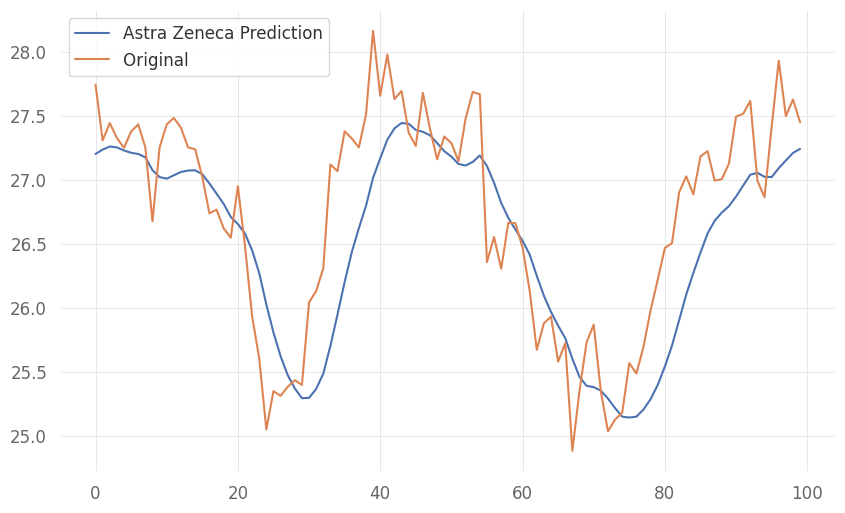

In [ ]:
plt.plot(X_lstm_azn_end[1000:1100], label='Astra Zeneca Prediction')
plt.plot(azn_og[1000:1100], label='Original')
plt.legend()

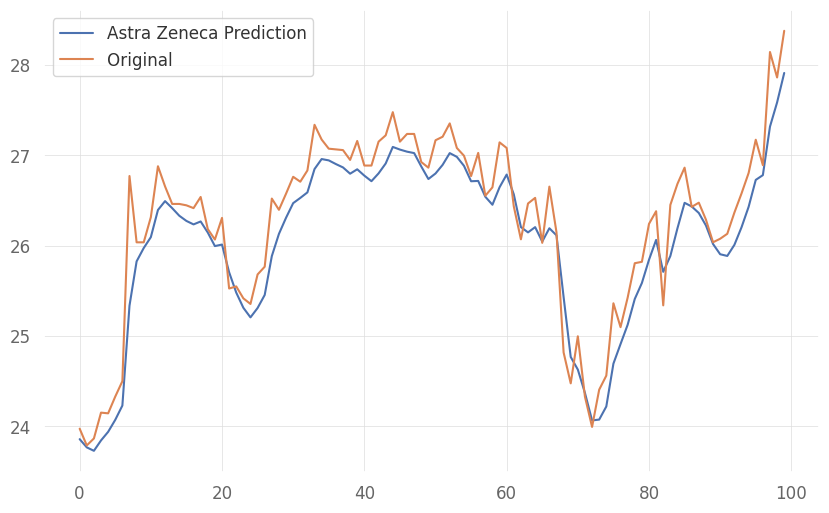

In [ ]:
plt.plot(X_lstm_intel_end[1000:1100], label='Intel Prediction')
plt.plot(intel_og[1000:1100], label='Original')
plt.legend()

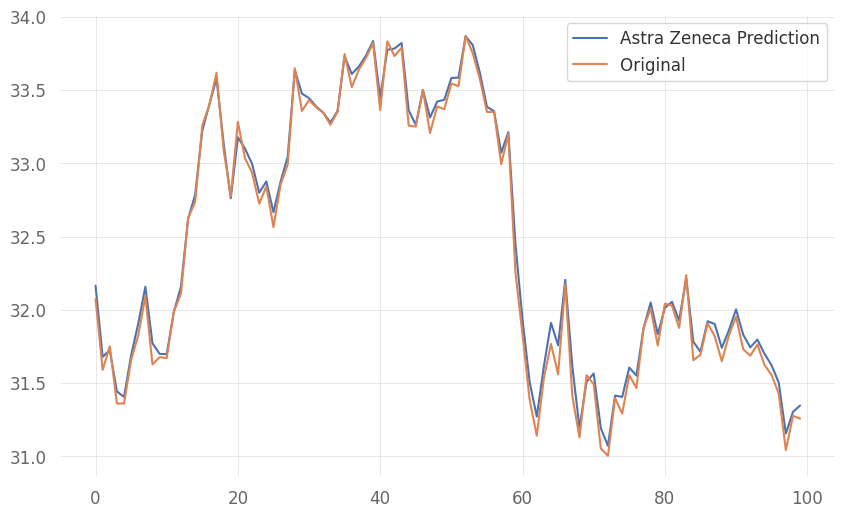

In [ ]:
plt.plot(X_lstm_hsbc_end[1000:1100], label='HSBC Prediction')
plt.plot(hsbc_og[1000:1100], label='Original')
plt.legend()

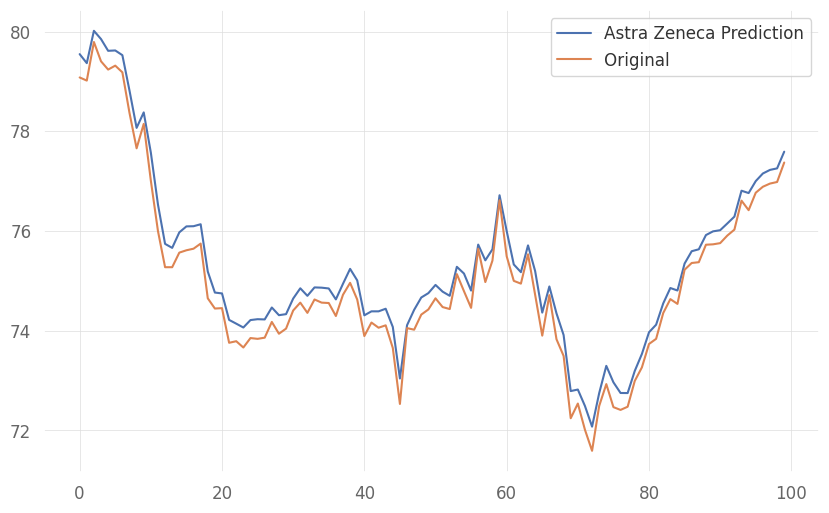

In [ ]:
plt.plot(X_lstm_mcd_end[1000:1100], label='McDonalds Prediction')
plt.plot(mcd_og[1000:1100], label='Original')
plt.legend()

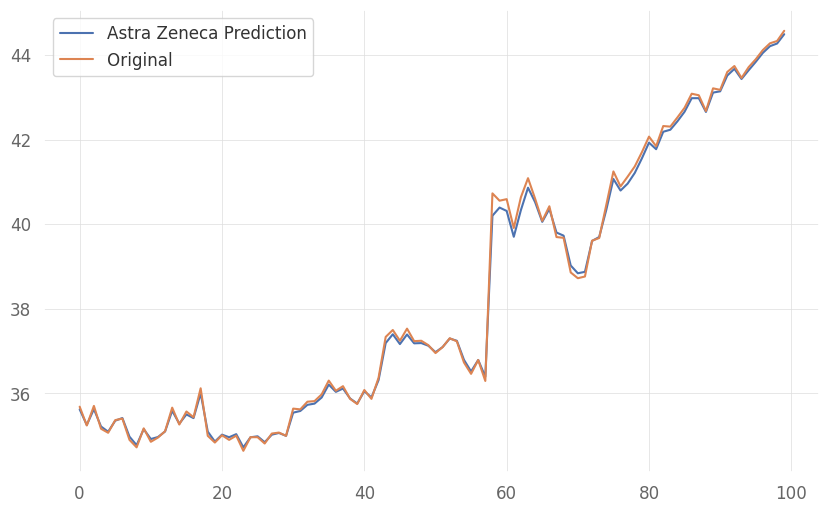

In [ ]:
plt.plot(X_lstm_nike_end[1000:1100], label='Nike Prediction')
plt.plot(nike_og[1000:1100], label='Original')
plt.legend()

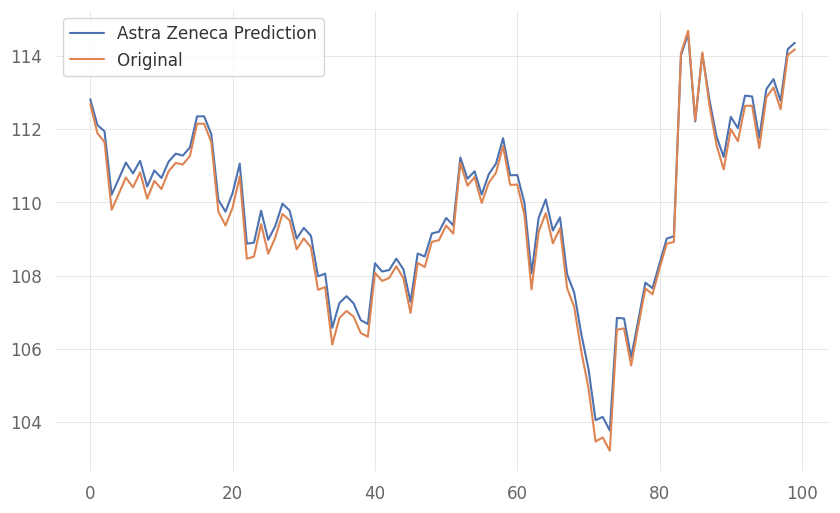

In [ ]:
plt.plot(X_lstm_tm_end[1000:1100], label='Toyota Prediction')
plt.plot(tm_og[1000:1100], label='Original')
plt.legend()